# Selecting the isolates

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from Bio import SeqIO
import seaborn as sns


In [16]:
# Change the current working directory 
os.chdir('/path/to/your/dir/')
print("Current working directory:", os.getcwd())

In [4]:
# Load the Excel file with all isolates that have whole genome sequence data
data=pd.read_excel('./BIGSDB_datasets/all/All_KP1_assebly_check_passed.xlsx')   
print(data.shape)
#print(data.head())

(37874, 37)


In [5]:
# open QC failed isolates
qc_failed_isolates=pd.read_csv('./BIGSDB_datasets/all/qc_failed_isolates.txt', header=None)   
qc_failed_isolates=list(qc_failed_isolates[0])
#print(qc_failed_isolates)
print(len(qc_failed_isolates))

5627


In [6]:
# Remove the prefix (id) or suffix(isolate name) from the QC failed isolates names
failed_names = [entry.split('_', 1)[1] if '_' in entry else entry for entry in qc_failed_isolates]
failed_ids = [entry.split('_', 1)[0] if '_' in entry else entry for entry in qc_failed_isolates]
failed_ids =  [int(entry) for entry in failed_ids]
print(failed_names[0])
print(failed_ids[0])

SRR9858799
42290


In [7]:
# remove qc failed isolates
qc_passed_KP1 = data[~data['id'].isin(failed_ids)]
print(qc_passed_KP1.shape)
print(qc_passed_KP1.head(1))

(32247, 37)
   id isolate       aliases  sender  curator date_entered   datestamp  \
0   6  02A029  02A029; SB14       2      504   2006-09-05  2022-11-03   

  taxonomic_designation phylogroup_from_ST QC_status  ...  \
0         K. pneumoniae       Kp1 (7 loci)         0  ...   

   scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
0                  9677  0_0_429_0_42_0_1_0_0_0                       Kp1   

  Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
0                      SL23                        CG23        23   

  rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
0                19197             Klebsiella    Klebsiella pneumoniae   

  subspecies (Ribosomal MLST)  
0                         NaN  

[1 rows x 37 columns]


In [8]:
SL307=qc_passed_KP1[qc_passed_KP1['Sublineage (scgMLST629_S)']=='SL307']
print(SL307.shape)
print(SL307.head(1))

(1781, 37)
       id isolate aliases  sender  curator date_entered   datestamp  \
577  3877    KP48     NaN     274      523   2016-04-05  2024-06-03   

    taxonomic_designation phylogroup_from_ST QC_status  ...  \
577         K. pneumoniae       Kp1 (7 loci)         0  ...   

     scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
577                  4274  0_0_369_0_0_0_0_0_1_18                       Kp1   

    Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
577                     SL307                       CG307       307   

    rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
577                19275             Klebsiella    Klebsiella pneumoniae   

    subspecies (Ribosomal MLST)  
577                         NaN  

[1 rows x 37 columns]


In [9]:
ST307=qc_passed_KP1[qc_passed_KP1['ST (MLST)']==307]
print(ST307.shape)
print(ST307.head(1))

(1706, 37)
       id isolate aliases  sender  curator date_entered   datestamp  \
577  3877    KP48     NaN     274      523   2016-04-05  2024-06-03   

    taxonomic_designation phylogroup_from_ST QC_status  ...  \
577         K. pneumoniae       Kp1 (7 loci)         0  ...   

     scgST (scgMLST629_S)  LINcode (scgMLST629_S) Phylogroup (scgMLST629_S)  \
577                  4274  0_0_369_0_0_0_0_0_1_18                       Kp1   

    Sublineage (scgMLST629_S) Clonal group (scgMLST629_S) ST (MLST)  \
577                     SL307                       CG307       307   

    rST (Ribosomal MLST) genus (Ribosomal MLST) species (Ribosomal MLST)  \
577                19275             Klebsiella    Klebsiella pneumoniae   

    subspecies (Ribosomal MLST)  
577                         NaN  

[1 rows x 37 columns]


In [10]:
#make a copy of the df
df_LIN10=SL307.copy()

#full LINcode
unique_LIN10 = df_LIN10['LINcode (scgMLST629_S)'].unique()
print(len(unique_LIN10))

1080


In [11]:
## For each unique LINcode value get one (the first) corresponding BIGSDB id

# Create a dictionary to store the unique values and corresponding ids
unique_ids = {}

# Iterate over unique values and select one corresponding id for each
for value in unique_LIN10:
    # Get the first id corresponding to this unique value
    id_value = df_LIN10[df_LIN10['LINcode (scgMLST629_S)'] == value]['id'].iloc[0]
    unique_ids[value] = id_value


len(unique_ids.values())

1080

In [22]:
unique_ids_list = list(unique_ids.values())
# Specify the output file name
output_file = './Centaur_project/Klebsiella/KpI/ST307/unique_ids_LIN10.txt'
!mkdir -p './Centaur_project/Klebsiella/KpI/ST307/'
# Open the file in write mode and save the list
with open(output_file, 'w') as file:
    for item in unique_ids_list:
        file.write(f"{item}\n")  # Write each id followed by a newline

In [12]:
unique_ids_LIN10=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/unique_ids_LIN10.txt', header=None)
unique_ids_LIN10=list(unique_ids_LIN10[0])
#unique_ids_LIN10

In [13]:
names=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/names.txt', header=None)
names=list(names[0])
modified_names = [item.split("_")[0] for item in names]
#modified_names

In [25]:
diff_set = list(set(unique_ids_LIN10) - set(modified_names))
print(len(diff_set))

1080


In [26]:
filtered_list = [item for item in unique_ids_LIN10 if not any(str(item).startswith(prefix) for prefix in modified_names)]
print(filtered_list) 

[14084, 15145, 27593, 28261, 28297, 34212, 41177, 41982, 42163, 43233, 44299, 44306, 45412, 46397, 49852, 49973, 51042, 57689, 58184]


# Allele statistics with all the 4340 cgMLST95 loci

In [14]:
# the 4340 loci included in the 0.95 threshold cg MLST
loci_95=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt', sep='\t', header=None)   
loci_95=list(loci_95[0])
print(len(loci_95))
#loci_95

4340


# Allele lengths


In [4]:
#allele lengths per locus
from Bio import SeqIO

# Path to the file with locus names
locus_list_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'
output_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt'

# Open output file to write the lengths
with open(output_file, 'w') as outfile:
    # Read each locus name from the list
    with open(locus_list_file, 'r') as infile:
        for line in infile:
            locus = line.strip()
            fasta_file = f'./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/CreateSchema/CreateSchema/schema/{locus}.fasta'
            
            # Check if the FASTA file exists for each locus
            try:
                # Loop through each allele sequence in the FASTA file
                for record in SeqIO.parse(fasta_file, 'fasta'):
                    allele_length = len(record.seq)
                    outfile.write(f"{locus}\t{record.id}\t{allele_length}\n")
            except FileNotFoundError:
                print(f"File {fasta_file} not found for locus {locus}.")

In [4]:
# Load the file 
allele_lengths=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')   
print(allele_lengths.shape)
print(allele_lengths.head())

(30929, 3)
                  locus                  allele  length
0  11827-35816-protein1  11827-35816-protein1_1    1425
1  11827-35816-protein1  11827-35816-protein1_2    1425
2  11827-35816-protein1  11827-35816-protein1_3    1425
3  11827-35816-protein1  11827-35816-protein1_4    1425
4  11827-35816-protein1  11827-35816-protein1_5    1425


In [5]:
#Sanity check
unique_entries = allele_lengths['locus'].unique()
print(len(unique_entries))

4340


In [6]:
# Group by 'Locus' and find the row with the maximum 'Length' for each group
longest_alleles = allele_lengths.loc[allele_lengths.groupby('locus')['length'].idxmax()]
print(longest_alleles.shape)
print(longest_alleles.head())

(4340, 3)
                      locus                     allele  length
0      11827-35816-protein1     11827-35816-protein1_1    1425
15    11827-35816-protein10    11827-35816-protein10_1     390
18   11827-35816-protein100   11827-35816-protein100_1     669
21  11827-35816-protein1001  11827-35816-protein1001_1     354
28  11827-35816-protein1002  11827-35816-protein1002_1    1209


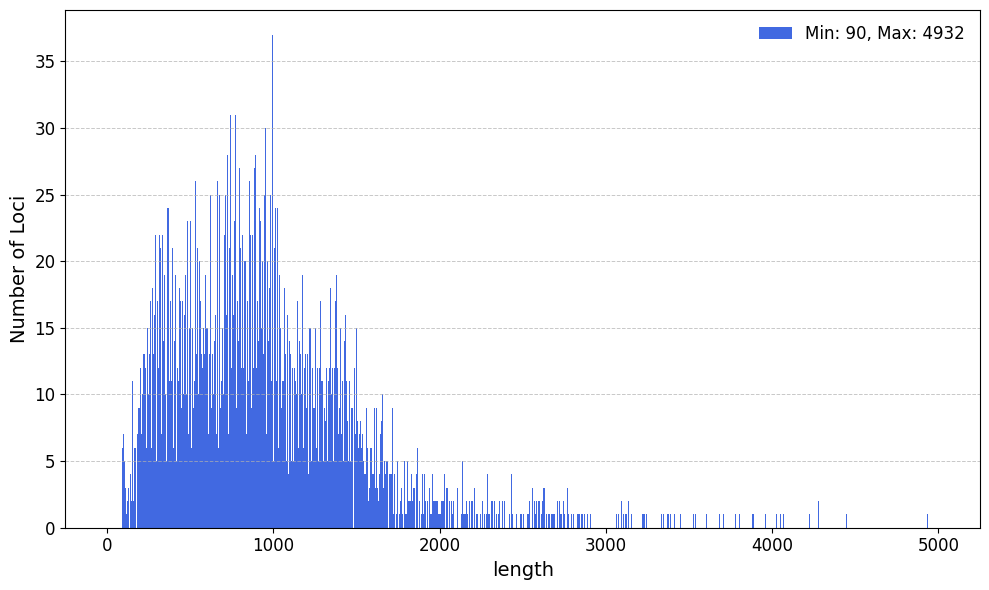

In [7]:
# Calculate the range and bins
min_value = longest_alleles['length'].min()
max_value = longest_alleles['length'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    longest_alleles['length'], 
    bins=1000, 
    range=(0, 5000), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('length', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/longest_allele_lengths_all_cgMLST95.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Number of alleles per locus

In [375]:
# open the file coming from SchemaEvaluator_95 (containing only the loci present in the 95% of isolates) schema_report. 
# when you open this html file you can download a table Allele Analysis
allele_analysis=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_analysis.tsv', sep='\t', header=0)   

print(allele_analysis.shape)
print(allele_analysis.head(1))

(4340, 14)
                  Locus  Total Alleles  Valid Alleles  Invalid Alleles  \
0  11827-35816-protein1             15             15                0   

   Proportion of Validated Alleles  Distinct Protein Alleles  Incomplete ORF  \
0                                1                         9               0   

   Ambiguous Bases  Missing Start/Stop Codon  In-frame Stop Codon  \
0                0                         0                    0   

   Alleles < 0bp  Alleles below threshold  Alleles above threshold  \
0              0                        0                        0   

   Missing Allele IDs  
0                   0  


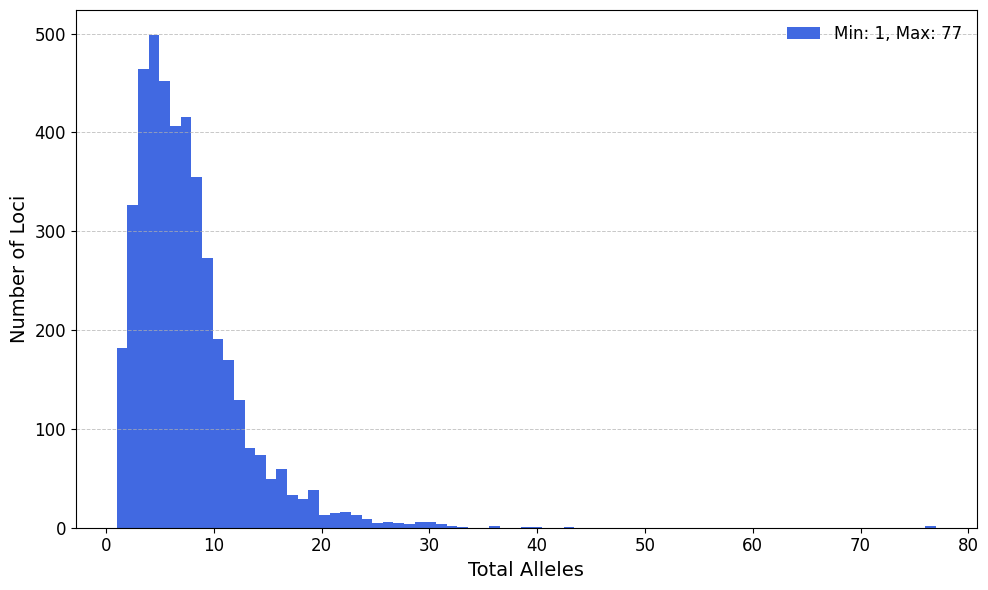

In [9]:
import matplotlib.pyplot as plt

# Calculate the range and bins
min_value = allele_analysis['Total Alleles'].min()
max_value = allele_analysis['Total Alleles'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    allele_analysis['Total Alleles'], 
    bins=bins, 
    range=(min_value, max_value), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('Total Alleles', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/total_alleles_all_cgMLST95.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Allele frequencies in each locus

In [11]:
# Load the results_alleles.tsv output file of AlleleCall with only the 95 threshold loci 
alleles=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/AlleleCall/AlleleCall_95/results_alleles.tsv', sep='\t', header=0, low_memory=False)   
# Set the first column as rownames (index)
alleles.set_index(alleles.columns[0], inplace=True)

print(alleles.shape)
print(alleles.head())

# For each locus, calculate the frequency of each allele and save it in a separate file
# Directory to save the frequency files
output_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    
    # Define the file path for the output
    output_file = os.path.join(output_dir, f'{locus}_frequencies.tsv')
    
    # Save the frequencies as a TSV file
    allele_frequencies.to_csv(output_file, sep='\t', index=False)
    

(1080, 4340)
            11827-35816-protein1 11827-35816-protein10 11827-35816-protein100  \
FILE                                                                            
11827_35816                    1                     1                      1   
11836_39000                    1                     1                      1   
11855_43112                    1                     1                      1   
11863_45340                    1                     1                      1   
11865_45342                    1                     1                      1   

            11827-35816-protein1001 11827-35816-protein1002  \
FILE                                                          
11827_35816                       1                       1   
11836_39000                       1                       1   
11855_43112                       1                       1   
11863_45340                       1                       1   
11865_45342                       1      

In [12]:
# List to collect all allele frequency data
all_allele_frequencies = []

# Iterate over the columns (loci) in the alleles DataFrame
for locus in alleles.columns:
    # Get the allele frequencies for the current locus
    allele_frequencies = alleles[locus].value_counts(normalize=True).reset_index()
    allele_frequencies.columns = ['allele', 'frequency']
    
    # Add the Locus name to the DataFrame
    allele_frequencies['locus'] = locus
    
    # Append the data to the list
    all_allele_frequencies.append(allele_frequencies)

# Combine all DataFrames into a single DataFrame
final_allele_frequencies = pd.concat(all_allele_frequencies, ignore_index=True)

# Directory to save the final frequency file
output_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the file path for the final output
output_file = os.path.join(output_dir, 'all_allele_frequencies.tsv')

# Save the combined DataFrame as a single TSV file
final_allele_frequencies.to_csv(output_file, sep='\t', index=False)

print(f"All allele frequencies have been saved to {output_file}")

All allele frequencies have been saved to ./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/all_allele_frequencies.tsv


In [13]:
#load the file
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/all_allele_frequencies.tsv', sep='\t', low_memory=False)   

print(allele_frequencies.shape)
print(allele_frequencies.head())

(35005, 3)
  allele  frequency                 locus
0      1   0.968519  11827-35816-protein1
1      5   0.009259  11827-35816-protein1
2      2   0.005556  11827-35816-protein1
3      3   0.003704  11827-35816-protein1
4    LNF   0.001852  11827-35816-protein1


In [14]:
allele_frequencies[allele_frequencies['allele'].str.startswith(('INF', 'PLOT3', 'PLOT5', 'LOTSC', 'NIPH', 'NIPHEM', 'ALM', 'ASM', 'PAMA', 'LNF'))]

,allele,frequency,locus
4,LNF,0.001852,11827-35816-protein1
18,NIPH,0.000926,11827-35816-protein10
21,LNF,0.000926,11827-35816-protein100
25,LNF,0.004630,11827-35816-protein1001
29,ASM,0.000926,11827-35816-protein1001
...,...,...,...
34948,LNF,0.011111,58124-MB3935-protein649
34965,LNF,0.000926,59604-ERR6057985-protein556
34969,LNF,0.003704,59640-ERR6058038-protein2755
34984,ASM,0.000926,59640-ERR6058038-protein3600


In [15]:
# Check for loci containing alleles marked as 'NIPHEM', 'NIPH' (Non-Informative Paralogous Hits) by chewBBACA 
# Create an empty list to store locus names
NIPH_loci_above_threshold = []
Threshold=0.01
# Group by the 'Locus' column
grouped = allele_frequencies.groupby('locus')

# Iterate over each group
for locus, group in grouped:
    # Calculate the sum of frequencies for 'NIPHEM' and 'NIPH'
    frequency_sum = group.loc[group['allele'].isin(['NIPHEM', 'NIPH']), 'frequency'].sum()
    
    # Check if the sum is >= threshold
    if frequency_sum >= Threshold:
        #print(frequency_sum)
        NIPH_loci_above_threshold.append(locus)

# Display the result
print(len(NIPH_loci_above_threshold))

# Assuming all_loci is your list
with open("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt", "w") as f:
    for locus in NIPH_loci_above_threshold:
        f.write(f"{locus}\n")

18


In [16]:
# remove the 'NIPHEM' + 'NIPH' 18 loci from cgMLST_95 loci 
filtered_cgMLST_95 = list(set(loci_95) - set(NIPH_loci_above_threshold))
# Save 
with open("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/filtered_cgMLST_95_loci_noNIPH.txt", "w") as file:
    for item in filtered_cgMLST_95:
        file.write(f"{item}\n")

print(len(filtered_cgMLST_95))

4322


In [17]:
# Modify the Allele column to keep only the suffix after the '_'
allele_lengths=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')   
allele_lengths['allele'] = allele_lengths['allele'].str.split('_').str[1]

# Ensure the Allele column is numeric (convert to number, coercing errors to NaN)
# classification type counts (INF, PLOT3, PLOT5, LOTSC, NIPH, NIPHEM, ALM, ASM, PAMA, LNF) will turn to NAN
allele_lengths['allele'] = pd.to_numeric(allele_lengths['allele'], errors='coerce')
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')

# merge operation
merged_df = allele_frequencies.merge(allele_lengths, on=['locus', 'allele'], how='left')

# Fill any missing 'Length' values with 0 (if the allele is not found in allele_lengths)
merged_df['length'].fillna(0, inplace=True)

# Save the merged DataFrame
merged_df.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', index=False)

In [18]:
# Group by Locus and Length, summing the Frequency for each group
grouped_df = merged_df.groupby(['locus', 'length'], as_index=False)['frequency'].sum()

# Save the grouped DataFrame
grouped_df.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/grouped_allele_frequencies_by_length.tsv', sep='\t', index=False)
print(grouped_df.shape)
print(grouped_df.head(100))


(9585, 3)
                      locus  length  frequency
0      11827-35816-protein1     0.0   0.001852
1      11827-35816-protein1  1425.0   0.998148
2     11827-35816-protein10     0.0   0.000926
3     11827-35816-protein10   390.0   0.999074
4    11827-35816-protein100     0.0   0.000926
..                      ...     ...        ...
95  11827-35816-protein1044  1500.0   0.994444
96  11827-35816-protein1046   324.0   1.000000
97  11827-35816-protein1047   186.0   1.000000
98  11827-35816-protein1048     0.0   0.003704
99  11827-35816-protein1048  2640.0   0.996296

[100 rows x 3 columns]


In [19]:
# Sanity check: Sum of frequencies for each Locus should be 1
locus_frequencies_check = grouped_df.groupby('locus')['frequency'].sum()
print(locus_frequencies_check.shape)
print(locus_frequencies_check.head(100))

(4340,)
locus
11827-35816-protein1       1.0
11827-35816-protein10      1.0
11827-35816-protein100     1.0
11827-35816-protein1001    1.0
11827-35816-protein1002    1.0
                          ... 
11827-35816-protein1109    1.0
11827-35816-protein111     1.0
11827-35816-protein1110    1.0
11827-35816-protein1111    1.0
11827-35816-protein1112    1.0
Name: frequency, Length: 100, dtype: float64


# Remove loci matching all BIGSdb and rMLST loci

In [33]:
# Path to the concatenated FASTA file
input_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/klebsiella_all_alleles.fa'
output_file = './Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt'

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header
    for record in SeqIO.parse(input_file, 'fasta'):
        # record.id expected in form: zraP_S|160
        if "|" in record.id:
            locus, allele_suffix = record.id.split("|", 1)
            allele = record.id.replace('|', '_')
        else:
            locus = record.id
            allele = record.id  # no change if no "|"
        allele_length = len(record.seq)
        outfile.write(f"{locus}\t{allele}\t{allele_length}\n")


In [22]:
# rMLST loci lengths
fasta_dir = "./Centaur_project/Klebsiella/Alleles/rMLST/fasta/"
names_file = "./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt"
output_file = "./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt"

# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

In [36]:
# For all new Kpn_cgMLST loci, calculate the number of alleles, and the min, max and median length

# Define directories and files
fasta_dir = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/fasta/"
names_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt"
output_file = "./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt"

# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

In [37]:
# For all new ST307 loci, calculate the number of alleles, and the min, max and median length

# Define directories and files
fasta_dir = "./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/fasta/"
names_file = "./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt"
output_file = "./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt"

# Read locus names to process
with open(names_file) as f:
    loci_set = set(line.strip() for line in f if line.strip())

with open(output_file, 'w') as outfile:
    outfile.write("locus\tallele\tlength\n")  # header

    for file in os.listdir(fasta_dir):
        if not (file.endswith('.fasta') or file.endswith('.fa')):
            continue
        locus = os.path.splitext(file)[0]
        if locus not in loci_set:
            continue
        fasta_path = os.path.join(fasta_dir, file)
        for record in SeqIO.parse(fasta_path, 'fasta'):
            allele = record.id.replace('|', '_')    # e.g. abc|10 -> abc_10
            allele_length = len(record.seq)
            outfile.write(f"{locus}\t{allele}\t{allele_length}\n")

In [20]:
#open length info files for new loci and BIGSDB loci
new_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
Kpn_cgMLST_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/allele_lengths.txt', sep='\t')
Kpn_cgMLST_Non_informative_paralogous_loci = pd.read_csv('./Centaur_project/Klebsiella/KpI/chewBBACA_LIN4/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt', sep='\t', header=None)
Kpn_cgMLST_Non_informative_paralogous_loci=list(Kpn_cgMLST_Non_informative_paralogous_loci[0])
# remove Non_informative_paralogous_loci from kpn cgMLST loci
Kpn_cgMLST_loci_lengths = Kpn_cgMLST_loci_lengths[~Kpn_cgMLST_loci_lengths['locus'].isin(Kpn_cgMLST_Non_informative_paralogous_loci)]


bigsdb_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/Alleles/klebsiella_all_alleles/allele_lengths.txt', sep='\t')
rMLST_loci_length = pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/allele_lengths.txt', sep='\t')
bigsdb_rMLST_Kpn_cgMLST_loci_lengths = pd.concat([bigsdb_loci_lengths, rMLST_loci_length, Kpn_cgMLST_loci_lengths], ignore_index=True)


# add this collumns to make the merge of this df easier
new_loci_lengths['length_new']=new_loci_lengths['length']
bigsdb_rMLST_Kpn_cgMLST_loci_lengths['length_old']=bigsdb_rMLST_Kpn_cgMLST_loci_lengths['length']

print(new_loci_lengths.shape)
print(new_loci_lengths.head(1))

print(bigsdb_rMLST_Kpn_cgMLST_loci_lengths.shape)
print(bigsdb_rMLST_Kpn_cgMLST_loci_lengths.tail(1))



(30929, 4)
                  locus                  allele  length  length_new
0  11827-35816-protein1  11827-35816-protein1_1    1425        1425
(2276687, 4)
                                   locus                               allele  \
2276686  9726-AUSMDU00021662-protein4021  9726-AUSMDU00021662-protein4021_631   

         length  length_old  
2276686    1197        1197  


In [25]:
# open scheme info from BIGSDB
schemes_members = pd.read_csv('./Centaur_project/Klebsiella/Alleles/scheme_members.txt', sep='\t')
schemes_members=schemes_members[['scheme_id', 'locus']]

schemes = pd.read_csv('./Centaur_project/Klebsiella/Alleles/schemes.txt', sep='\t')
schemes['scheme_id']=schemes['id']
schemes['Scheme']=schemes['name']
schemes=schemes[['scheme_id', 'Scheme']]

schemes_info = schemes_members.merge(schemes, on='scheme_id')[['Scheme', 'locus']]

# add rMLST loci
rMLST_loci = pd.read_csv('./Centaur_project/Klebsiella/Alleles/rMLST/rMLST_loci.txt', sep='\t', header=None)
rMLST_loci['locus']=rMLST_loci.iloc[:,0]
rMLST_loci['Scheme'] = 'rMLST'
rMLST_loci=rMLST_loci[['Scheme', 'locus']]
# Concatenate both DataFrames
schemes_info = pd.concat([schemes_info, rMLST_loci], ignore_index=True)
print(schemes_info.shape)
print(schemes_info.head(1))

(5534, 2)
  Scheme locus
0   MLST  gapA


In [26]:
# Ensure the column names align 
schemes_info.rename(columns={'locus': 'old_locus'}, inplace=True)

schemes_info

,Scheme,old_locus
0,MLST,gapA
1,MLST,infB
2,MLST,mdh
3,MLST,pgi
4,MLST,phoE
...,...,...
5529,rMLST,rpmF
5530,rMLST,rpmG
5531,rMLST,rpmH
5532,rMLST,rpmI


### Blast results between the new loci and the old loci

In [47]:
# Open all new loci alleles against all the alleles from BIGSDB blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1/'
names_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_Kpn_cgMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)


# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

bigsdb_blast=combined_df
# Save the combined DataFrame or inspect it
bigsdb_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_all.tsv',sep='\t', index=False)

print(bigsdb_blast.shape)
print(bigsdb_blast.head())

(4982, 18)
         Scheme                     qseqid           sseqid  pident  \
0    cgMLST_KpI    11827-35816-protein10_3  KPNJ2_RS09250|1  99.487   
1    cgMLST_KpI   11827-35816-protein100_1  KPNJ2_RS09680|1  99.701   
2  scgMLST629_S   11827-35816-protein100_1     KP1_3538_S|1  99.851   
3    scgMLST634   11827-35816-protein100_1       KP1_3538|1  99.850   
4    cgMLST_KpI  11827-35816-protein1001_1  KPNJ2_RS14520|1  99.435   

  alignment_length mismatch gapopen qstart qend sstart send  evalue  bitscore  \
0              390        2       0      1  390      1  390     0.0     710.0   
1              669        2       0      1  669      1  669     0.0    1225.0   
2              669        1       0      1  669      1  669     0.0    1230.0   
3              666        1       0      1  666      1  666     0.0    1225.0   
4              354        2       0      1  354      1  354     0.0     643.0   

        old_allele                 new_allele      old_locus  length_new  \

In [48]:
# Open all new loci alleles against the rMLST loci blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST'
names_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']


# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_Kpn_cgMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)

# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

rMLST_blast=combined_df
# Save the combined DataFrame or inspect it
rMLST_blast=combined_df
rMLST_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST.tsv', sep='\t', index=False)

print(rMLST_blast.shape)
print(rMLST_blast.head())

(48, 18)
  Scheme                     qseqid sseqid   pident alignment_length mismatch  \
0  rMLST  11827-35816-protein2403_1   rpmB  100.000              237        0   
1  rMLST  11827-35816-protein2404_1   rpmG   99.405              168        1   
2  rMLST  11827-35816-protein2653_1   rpsL   99.733              375        1   
3  rMLST  11827-35816-protein2654_1   rpsG  100.000              471        0   
4  rMLST  11827-35816-protein2691_1   rplM  100.000              429        0   

  gapopen qstart qend sstart send         evalue bitscore old_allele  \
0       0      1  237      1  237  3.720000e-126      438       rpmB   
1       0      1  168      1  168   2.740000e-86      305       rpmG   
2       0      1  375      1  375   0.000000e+00      688       rpsL   
3       0      1  471      1  471   0.000000e+00      870       rpsG   
4       0      1  429      1  429   0.000000e+00      793       rplM   

                  new_allele old_locus  length_new  length_old  
0  118

In [50]:
# Open all new ST307 loci alleles against all the Kpn_cgMLST type alleles and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_all_Kpn_cgMLST_type_alleles/'
names_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('|').str[0]
    df['old_allele'] = df['sseqid'].str.replace('|', '_')
    df['new_allele'] = df['qseqid']
    
    # Perform merge with scheme data
    df = df.merge(
        schemes_info[['old_locus', 'Scheme']],
        on='old_locus',
        how='left'
        )
    
    # Replace NaN values in the 'Scheme' column with 'No_scheme' for loci with no scheme
    df['Scheme'] = df['Scheme'].fillna('no_scheme')
    
    # Perform merge with length data
    df = df.merge(
        new_loci_lengths[['allele', 'length_new']],
        left_on='new_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        bigsdb_rMLST_Kpn_cgMLST_loci_lengths[['allele', 'length_old']],
        left_on='old_allele',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['Scheme', 'bitscore'], ascending=[True, False])

    # Keep the best match per scheme
    df = df.groupby('Scheme', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)

# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

Kpn_cgMLST_blast=combined_df
# Save the combined DataFrame or inspect it
Kpn_cgMLST_blast['Scheme']='Kpn_cgMLST'
Kpn_cgMLST_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_Kpn_cgMLST_type_alleles.tsv',sep='\t', index=False)

print(Kpn_cgMLST_blast.shape)
print(Kpn_cgMLST_blast.head())

(2751, 18)
       Scheme                     qseqid                            sseqid  \
0  Kpn_cgMLST     11827-35816-protein1_3  29735-ERR6293727-protein4901_165   
1  Kpn_cgMLST  11827-35816-protein1001_1     59943-YZ22WS188-protein3454_2   
2  Kpn_cgMLST  11827-35816-protein1002_1         6361-SB5865-protein785_30   
3  Kpn_cgMLST  11827-35816-protein1005_1        14921-T7-455-protein3152_3   
4  Kpn_cgMLST  11827-35816-protein1006_1        10513-BS76-A-protein1273_1   

   pident alignment_length mismatch gapopen qstart  qend sstart  send  \
0  98.316             1425       24       0      1  1425      1  1425   
1  99.153              354        3       0      1   354      1   354   
2  99.173             1209       10       0      1  1209      1  1209   
3  99.371              159        1       0      1   159      1   159   
4  99.800              999        2       0      1   999      1   999   

         evalue  bitscore                         old_locus  \
0  0.000000e+00   

In [27]:
#open all blast results (BIGSdb, rMLST, KpncgMLST)
bigsdb_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_bigsdb_allele_1_all.tsv', sep='\t')
rMLST_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_rMLST.tsv', sep='\t')
Kpn_cgMLST_blast=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_chewBBACA_alleles_VS_Kpn_cgMLST_type_alleles.tsv', sep='\t')
# concatenate the rMLST and the BIGSdb loci blast results together
all_blast = pd.concat([bigsdb_blast, rMLST_blast, Kpn_cgMLST_blast], ignore_index=True)

print(all_blast.shape)
print(all_blast.head(1))
print(all_blast.tail(1))

(7781, 18)
       Scheme                   qseqid           sseqid  pident  \
0  cgMLST_KpI  11827-35816-protein10_3  KPNJ2_RS09250|1  99.487   

   alignment_length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
0               390         2        0       1   390       1   390     0.0   

   bitscore       old_allele               new_allele      old_locus  \
0     710.0  KPNJ2_RS09250_1  11827-35816-protein10_3  KPNJ2_RS09250   

   length_new  length_old  
0         390         390  
          Scheme                          qseqid  \
7780  Kpn_cgMLST  59670-ERR6058076-protein2658_2   

                                sseqid  pident  alignment_length  mismatch  \
7780  33247-SRR10368383-protein3973_31  99.716              1761         5   

      gapopen  qstart  qend  sstart  send  evalue  bitscore  \
7780        0       1  1761       1  1761     0.0    3225.0   

                            old_allele                      new_allele  \
7780  33247-SRR10368383-protein39

### Make the identity and coverage check

In [28]:
all_blast['coverage_new']= all_blast['alignment_length']/all_blast['length_new']
all_blast['coverage_old']= all_blast['alignment_length']/all_blast['length_old']


blast_results_check_passed = all_blast[
    (all_blast['pident'] >= 80) &
    ((all_blast['coverage_new'] >= 0.8) | (all_blast['coverage_old'] >= 0.8))
]

#save
blast_results_check_passed.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t', index=False)

print(blast_results_check_passed.shape)
print(blast_results_check_passed.head())

(7612, 20)
         Scheme                     qseqid           sseqid  pident  \
0    cgMLST_KpI    11827-35816-protein10_3  KPNJ2_RS09250|1  99.487   
1    cgMLST_KpI   11827-35816-protein100_1  KPNJ2_RS09680|1  99.701   
2  scgMLST629_S   11827-35816-protein100_1     KP1_3538_S|1  99.851   
3    scgMLST634   11827-35816-protein100_1       KP1_3538|1  99.850   
4    cgMLST_KpI  11827-35816-protein1001_1  KPNJ2_RS14520|1  99.435   

   alignment_length  mismatch  gapopen  qstart  qend  sstart  send  evalue  \
0               390         2        0       1   390       1   390     0.0   
1               669         2        0       1   669       1   669     0.0   
2               669         1        0       1   669       1   669     0.0   
3               666         1        0       1   666       1   666     0.0   
4               354         2        0       1   354       1   354     0.0   

   bitscore       old_allele                 new_allele      old_locus  \
0     710.0  KPNJ2_

In [31]:
Kpn_cgMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='Kpn_cgMLST']
print(Kpn_cgMLST.shape)
#print(Kpn_cgMLST.head(1))

(2714, 20)


In [33]:
scgMLST629_S=blast_results_check_passed[blast_results_check_passed['Scheme']=='scgMLST629_S']
print(scgMLST629_S.shape)
#print(scgMLST629_S.head())

(597, 20)


In [34]:
rMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='rMLST']
print(rMLST.shape)
#print(rMLST.head())

(48, 20)


In [16]:
# Get gene info from GBFF files produced by bakta
base_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/bakta_results/'
loci_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/ExtractCgMLST/ExtractCgMLST/cgMLSTschema95.txt'

# Output files
gene_output = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/gene_info.tsv'
product_output = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/product_info.tsv'
tag_output = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/tag_info.tsv'

# Function to extract gene and product information
def extract_info_from_gbff(file):
    gene_name = "N/A"
    locus_tag = "N/A"
    product_name = "N/A"

    
    for record in SeqIO.parse(file, "genbank"):
        for feature in record.features:
            if feature.type == "gene":
                gene_name = feature.qualifiers.get('gene', ['N/A'])[0]
                locus_tag = feature.qualifiers.get('locus_tag', ['N/A'])[0]
            if feature.type == "CDS":
                product_name = feature.qualifiers.get('product', ['N/A'])[0]

    return gene_name, locus_tag, product_name

# Read the loci names from the file
with open(loci_file, 'r') as lf:
    loci_list = [line.strip() for line in lf]

# Open the output files for writing
with open(gene_output, 'w') as gene_file, open(tag_output, 'w') as tag_file, open(product_output, 'w') as product_file:
    # Write headers
    gene_file.write("locus\tgene\n")
    tag_file.write("locus\tlocus_tag\n")
    product_file.write("locus\tproduct\n")    
    
    # Iterate over each locus
    for locus in loci_list:
        # Construct the path to the GBFF file
        gbff_path = os.path.join(base_dir, locus, 'ST307_cgMLST.gbff')
        
        if os.path.exists(gbff_path):
            # Extract gene, locus tag, product and pseudogene type info
            gene, tag, product = extract_info_from_gbff(gbff_path)
            
            # Write the locus, gene, and product to the respective TSV files
            gene_file.write(f"{locus}\t{gene}\n")
            tag_file.write(f"{locus}\t{tag}\n")
            product_file.write(f"{locus}\t{product}\n")
            
        # else:
        #     print(f"File not found: {gbff_path}")

In [ ]:
# open the bakta info files
gene = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/gene_info.tsv', sep='\t')
product = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/product_info.tsv', sep='\t')
tag = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/tag_info.tsv', sep='\t')

#Merge annotation info
bakta = gene.merge(product[['locus', 'product', ]], on='locus', how='inner')
bakta = bakta.merge(tag[['locus', 'locus_tag', ]], on='locus', how='inner')

# add length info
lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
bakta = bakta.merge(
    lengths[['locus', 'length', 'allele']],
    on='locus',
    how='right'
)

bakta.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/full_gene_info.tsv', sep='\t', index=False)
print(bakta.shape)
print(bakta.head())

In [35]:
# open the bakta info files
gene = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/gene_info.tsv', sep='\t')
product = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/product_info.tsv', sep='\t')
tag = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/tag_info.tsv', sep='\t')

#Merge annotation info
bakta = gene.merge(product[['locus', 'product', ]], on='locus', how='inner')
bakta = bakta.merge(tag[['locus', 'locus_tag', ]], on='locus', how='inner')

# add length info
lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
bakta = bakta.merge(
    lengths[['locus', 'length', 'allele']],
    on='locus',
    how='right'
)

bakta.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/full_gene_info.tsv', sep='\t', index=False)
print(bakta.shape)
print(bakta.head())

(30929, 6)
                  locus  gene                 product     locus_tag  length  \
0  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   
1  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   
2  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   
3  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   
4  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   

                   allele  
0  11827-35816-protein1_1  
1  11827-35816-protein1_2  
2  11827-35816-protein1_3  
3  11827-35816-protein1_4  
4  11827-35816-protein1_5  


# Define type alleles with the most frequent allele

In [42]:
# the new loci that have high frequency of NIPH+NIPHEM alleles
NIPH_loci_above_threshold = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/Non_informative_paralogous_loci_0.01.txt', sep='\t', header=None)
NIPH_loci_above_threshold=list(NIPH_loci_above_threshold[0])
#print(len(NIPH_loci_above_threshold))

#open
blast_results_check_passed = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t')
blast_results_check_passed['new_locus'] = blast_results_check_passed['new_allele'].str.split('_').str[0]
#print(blast_results_check_passed.shape)
#print(blast_results_check_passed.head(1))

# name of the new loci which are matching the scgMLST, Kpn_cgMLST and rMLST loci
Kpn_cgMLST=blast_results_check_passed[blast_results_check_passed['Scheme']=='Kpn_cgMLST']
Kpn_cgMLST_loci=list(Kpn_cgMLST['new_locus'])
scgMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='scgMLST629_S']
scgMLST_loci=list(scgMLST['new_locus'])
rMLST = blast_results_check_passed[blast_results_check_passed['Scheme']=='rMLST']
rMLST_loci=list(rMLST['new_locus'])

# print(len(loci_95))
# print(len(Kpn_cgMLST))
# print(len(scgMLST))
# print(len(rMLST))


filtered_loci = set(loci_95) - set(NIPH_loci_above_threshold) - set(Kpn_cgMLST_loci) - set(scgMLST_loci) - set(rMLST_loci)

# Convert the list to a pandas DataFrame
filtered_loci_df = pd.DataFrame(filtered_loci, columns=['Locus'])

# Save the DataFrame to a .txt file
filtered_loci_df.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/filtered_ST307_loci_974.txt', sep='\t', index=False, header=None)

print(len(filtered_loci))

974


In [44]:
filtered_loci = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/filtered_ST307_loci_974.txt', sep='\t', header=None)
filtered_loci=filtered_loci[0]


In [45]:
#load the file with allele frequencies with lengths
allele_frequencies=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_frequencies_with_lengths.tsv', sep='\t', low_memory=False)   

#There are certain loci that have as most prevalent allele the LNF(Loci Not Found - but stil less than 5% in all cases)
# Convert 'Allele' to numeric and filter out rows where conversion failed to avoid chosing allele which has no sequence
allele_frequencies['allele'] = pd.to_numeric(allele_frequencies['allele'], errors='coerce')
filtered_allele_frequencies = allele_frequencies.dropna(subset=['allele'])

# Group by 'Locus' and find the row with the maximum 'Frequency' for each group
frequent_alleles = filtered_allele_frequencies.loc[filtered_allele_frequencies.groupby('locus')['frequency'].idxmax()]

# keep only filtered alleles
frequent_alleles = frequent_alleles[frequent_alleles['locus'].isin(filtered_loci)]
#frequent_alleles["Allele"] = frequent_alleles["Allele"].astype(int)
print(frequent_alleles.shape)
print(frequent_alleles.head(1))

(974, 4)
    allele  frequency                  locus  length
16     1.0   0.997222  11827-35816-protein10   390.0


In [50]:
# Calculate min_length: Length * 0.95, then round to nearest multiple of 3
frequent_alleles['min_length'] = (((frequent_alleles['length'] * 0.95) / 3).round() * 3).astype(int)

# Calculate max_Length: Length * 1.05, then round to nearest multiple of 3
frequent_alleles['max_length'] = (((frequent_alleles['length'] * 1.05) / 3).round() * 3).astype(int)
print(frequent_alleles.shape)
frequent_alleles.head(1)

(974, 6)


,allele,frequency,locus,length,min_length,max_length
16,1.0,0.997222,11827-35816-protein10,390.0,372,408


### get the sequence for a specific allele from a locus file

In [126]:
# Directory containing the locus fasta files
locus_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/CreateSchema/CreateSchema/schema/'
destination_dir='./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'
!mkdir -p './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'
# Function to get the sequence for a specific allele from a locus file
def get_allele_sequence(locus, allele_number):
    fasta_file = os.path.join(locus_dir, f"{locus}.fasta")
    for record in SeqIO.parse(fasta_file, "fasta"):
        if record.id == f"{locus}_{allele_number}":
            return record.seq

sequences = []
for locus in filtered_loci:
    allele_number = int(frequent_alleles.loc[frequent_alleles['locus'] == locus, 'allele'].item())
    sequence = get_allele_sequence(locus, allele_number)
    if sequence:
        sequences.append((f"{locus}_{allele_number}", sequence))
    
# Write sequences to a new fasta file for the isolate    
with open(f"{destination_dir}frequent_type_alleles.fasta", "w") as output_handle:
    for name, seq in sequences:
        output_handle.write(f">{name}\n{seq}\n")

In [127]:
# from the fasta files containing the alleles of each isolates used for type alleles, extract locus and sequence

destination_dir='./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/'
# Initialize an empty list to store locus and sequence information
data = []  
# Parse the FASTA file
for record in SeqIO.parse('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_type_alleles.fasta', "fasta"):
    header = record.id  
    sequence = str(record.seq) 
        
    # Extract the locus name (everything before the last '_')
    locus = "_".join(header.split("_")[:-1])
        
    # Append the data
    data.append({"locus": locus, "sequence": sequence})
    
# Create a pandas DataFrame
frequent_locus_sequences = pd.DataFrame(data)
    
# Save the DataFrame to a TSV file named after the isolate
output_filename = "./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_locus_sequences.tsv"
frequent_locus_sequences.to_csv(output_filename, sep='\t', index=False)

In [51]:
# open annotations info 
frequent_locus_sequences=pd.read_csv("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/frequent_locus_sequences.tsv", sep='\t')
print(frequent_locus_sequences.shape)
print(frequent_locus_sequences.head(1))

(974, 2)
                     locus                                           sequence
0  11827-35816-protein3650  ATGAAACTCGCGCCCCGCACCTTTTTCGCCCTTTCCGCTCTGACGT...


In [78]:
# open annotations info 
annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/full_gene_info.tsv', sep='\t')
print(annotations.shape)
print(annotations.head(1))

(30929, 6)
                  locus  gene                 product     locus_tag  length  \
0  11827-35816-protein1  sbcB  exodeoxyribonuclease I  MELGMM_00005    1425   

                   allele  
0  11827-35816-protein1_1  


In [80]:
# merge 
type_alleles_with_length = pd.merge(frequent_locus_sequences, frequent_alleles[['locus', 'length', 'min_length', 'max_length', 'allele']], 
                                         left_on='locus', right_on='locus', how='inner')
#convert to integer
type_alleles_with_length['allele'] = type_alleles_with_length['allele'].astype(int)

# reformat the allele column values
type_alleles_with_length['allele'] = (
    type_alleles_with_length['locus'].astype(str) + '_' + type_alleles_with_length['allele'].astype(str)
)

type_alleles_with_annotations = pd.merge(type_alleles_with_length, annotations[['allele', 'gene', 'product']], 
                                         left_on='allele', right_on='allele', how='left')

type_alleles_with_annotations['length'] = type_alleles_with_annotations['length'].astype(int)

#save
type_alleles_with_annotations.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t', index=False)
type_alleles_with_annotations.to_excel('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.xlsx',  index=False)

In [81]:
# open type alleles with annotations
type_alleles_with_annotations=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t')
print(type_alleles_with_annotations.shape)
print(type_alleles_with_annotations.head(1))

(974, 8)
                     locus                                           sequence  \
0  11827-35816-protein3650  ATGAAACTCGCGCCCCGCACCTTTTTCGCCCTTTCCGCTCTGACGT...   

   length  min_length  max_length                     allele gene  \
0     519         492         546  11827-35816-protein3650_1  NaN   

                      product  
0  FidL-like membrane protein  


# Check and remove loci that have less than 90% detection rate after testing in BIGSdb

# Missing loci after BIGSdb testing

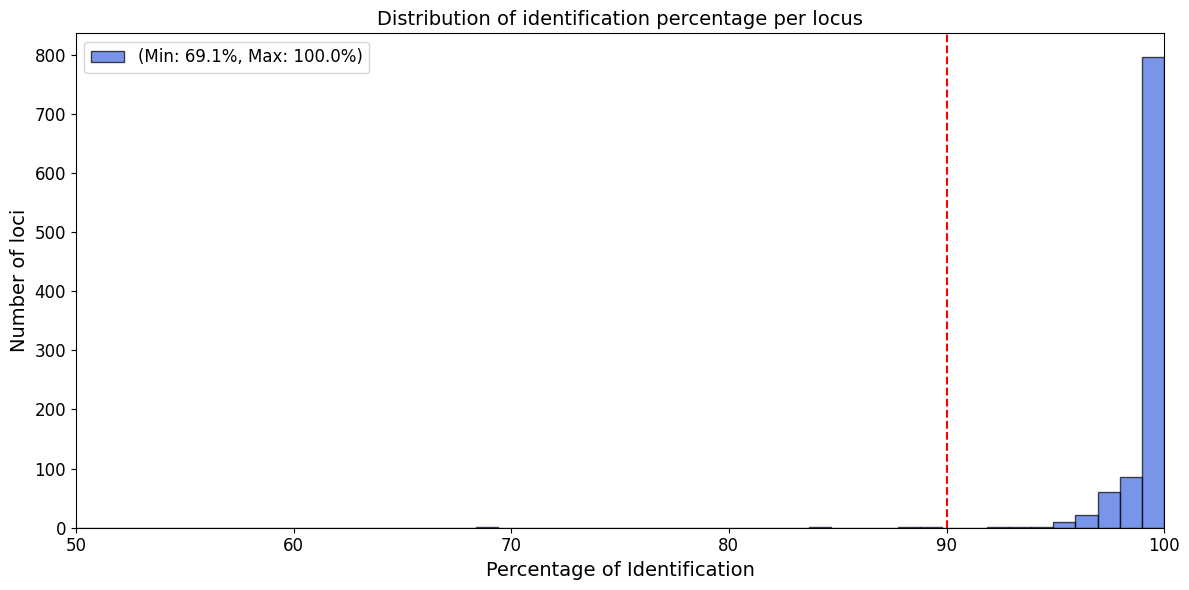

In [254]:
######### Missing loci after BIGSdb testing (but all with SL307 type alleles). 

# open setup isolates data
set_up=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_setup_isolates.xlsx")
set_up=set_up.iloc[:, 2:]
total_isolates=set_up.shape[0]
total_loci=set_up.shape[1]
# print(set_up.shape)
# print(set_up.head(1))

# Calculate the percentage of missing/identified data for each locus
percent_present_per_locus = 100 - (set_up.isna().sum() / total_isolates) * 100

# Identify loci with more than 10% missing data
loci_above_10_percent_missing = percent_present_per_locus[percent_present_per_locus <= 90].index.tolist()
# Save as a text file
with open("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/missing_loci_10%.txt", "w") as file:
    for item in loci_above_10_percent_missing:
        file.write(f"{item}\n")


# Get min and max values
min_kpn = percent_present_per_locus.min()
max_kpn = percent_present_per_locus.max()

# Define bins
bins = np.linspace(50, 100, 50)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(percent_present_per_locus, bins=bins, alpha=0.7, color='royalblue', edgecolor='black', label=f'(Min: {min_kpn:.1f}%, Max: {max_kpn:.1f}%)')

# Enhance the plot
plt.title(f'Distribution of identification percentage per locus', fontsize=14)
plt.xlabel('Percentage of Identification', fontsize=14)
plt.ylabel('Number of loci', fontsize=14)
plt.legend(fontsize=12)

# Add a vertical line at 10% for reference
plt.axvline(x=90, color='red', linestyle='--', label='90% threshold')

# Limit x-axis from 80% to 100%
plt.xlim(50, 100)

# Remove bar labels (if previously set)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the plot
!mkdir -p plots
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/setup_per_locus_before_filtering_missing_loci.png")

# Show the plot
plt.show()

In [143]:
len(loci_above_10_percent_missing)

4

# Check which loci are present in SL307
The matching loci would be taken from the SL147 loci, so we don't create redundant loci for sublineages

In [376]:
#open length info files for new loci and BIGSDB loci
ST307_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
# add this collumns to make the merge of this df easier
ST307_loci_lengths['allele_length_new']=ST307_loci_lengths['length']
print(ST307_loci_lengths.shape)
print(ST307_loci_lengths.head(1))

(30929, 4)
                  locus                  allele  length  allele_length_new
0  11827-35816-protein1  11827-35816-protein1_1    1425               1425


In [377]:
#open length info files for new loci and BIGSDB loci
ST147_loci_lengths = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/allele_lengths.txt', sep='\t')
# add this collumns to make the merge of this df easier
ST147_loci_lengths['allele_length_old']=ST147_loci_lengths['length']
print(ST147_loci_lengths.shape)
print(ST147_loci_lengths.head(1))

(42933, 4)
                     locus                     allele  length  \
0  10523-1014809-protein10  10523-1014809-protein10_1     495   

   allele_length_old  
0                495  


In [89]:
# Open all new loci alleles against all the alleles from ST147 blast results and combine into one df 
# after filtering for the best match (based on evalue (lowest) and bitscore (highest)) for each new locus

blast_dir = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_ST307_vs_all_ST147'
names_file = './Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/filtered_ST307_loci_975.txt'

# Columns for BLAST results
columns = ['qseqid', 'sseqid', 'pident', 'alignment_length', 'mismatch', 'gapopen', 
           'qstart', 'qend', 'sstart', 'send', 'evalue', 'bitscore']

# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Read the fileS
with open(names_file, 'r') as f:
    loci_files = [line.strip() for line in f]

# Process each file
for locus_file in loci_files:
    file_path = f"{blast_dir}/{locus_file}"
    
    # Read the BLAST results of each locus alleles vs all bigsdb alleles. 
    df = pd.read_csv(file_path, sep='\t', names=columns)  
    # Extract new and old locus names
    df['old_locus'] = df['sseqid'].str.split('_').str[0]
    df['new_locus'] = df['qseqid'].str.split('_').str[0]

    # Perform merge with length data
    df = df.merge(
        ST307_loci_lengths[['allele', 'allele_length_new']],
        left_on='qseqid',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])

    df = df.merge(
        ST147_loci_lengths[['allele', 'allele_length_old']],
        left_on='sseqid',
        right_on='allele',
        how='left'
        ).drop(columns=['allele'])
    
    # Sort
    df = df.sort_values(by=['new_locus', 'bitscore'], ascending=[True, False])

    # Keep the best match per locus
    df = df.groupby('new_locus', as_index=False).first()
   
    # Append the filtered DataFrame to the list
    filtered_dfs.append(df)


# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

SL147_blast=combined_df
# Save the combined DataFrame or inspect it
SL147_blast.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BLAST_results_all_ST307_vs_all_ST147.tsv',sep='\t', index=False)

print(SL147_blast.shape)
print(SL147_blast.head())

(697, 16)
                      new_locus                          qseqid  \
0  40775-SRR5386906-protein1381  40775-SRR5386906-protein1381_1   
1       11827-35816-protein2395       11827-35816-protein2395_1   
2   46367-SRR5386199-protein180   46367-SRR5386199-protein180_2   
3        11827-35816-protein801        11827-35816-protein801_1   
4       11827-35816-protein1574       11827-35816-protein1574_1   

                            sseqid  pident alignment_length mismatch gapopen  \
0  31245-SRR12569237-protein2666_1  99.725             1455        4       0   
1      10523-1014809-protein3701_5  99.020              918        9       0   
2  42720-SRR5386166-protein2342_14  97.687              951       22       0   
3       10523-1014809-protein821_8  99.317              879        6       0   
4      10523-1014809-protein3797_1  99.687              639        2       0   

  qstart  qend sstart  send  evalue  bitscore                      old_locus  \
0      1  1455      1  145

In [90]:
# Remove loci with >10% missing 
SL147_blast = SL147_blast[~SL147_blast['new_locus'].isin(loci_above_10_percent_missing)]
print(SL147_blast.shape)
print(SL147_blast.head())
print(SL147_blast.tail())

(695, 16)
                      new_locus                          qseqid  \
0  40775-SRR5386906-protein1381  40775-SRR5386906-protein1381_1   
1       11827-35816-protein2395       11827-35816-protein2395_1   
2   46367-SRR5386199-protein180   46367-SRR5386199-protein180_2   
3        11827-35816-protein801        11827-35816-protein801_1   
4       11827-35816-protein1574       11827-35816-protein1574_1   

                            sseqid  pident alignment_length mismatch gapopen  \
0  31245-SRR12569237-protein2666_1  99.725             1455        4       0   
1      10523-1014809-protein3701_5  99.020              918        9       0   
2  42720-SRR5386166-protein2342_14  97.687              951       22       0   
3       10523-1014809-protein821_8  99.317              879        6       0   
4      10523-1014809-protein3797_1  99.687              639        2       0   

  qstart  qend sstart  send  evalue  bitscore                      old_locus  \
0      1  1455      1  145

In [198]:
SL147_blast['coverage_new']= SL147_blast['alignment_length']/SL147_blast['allele_length_new']
SL147_blast['coverage_old']= SL147_blast['alignment_length']/SL147_blast['allele_length_old']


blast_results_check_passed_VSSL147 = SL147_blast[
    (SL147_blast['pident'] >= 80) &
    ((SL147_blast['coverage_new'] >= 0.8) | (SL147_blast['coverage_old'] >= 0.8))
]

#save
blast_results_check_passed_VSSL147.to_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', sep='\t', index=False)

# print(blast_results_check_passed_VSSL147.shape)
# print(blast_results_check_passed_VSSL147.head())

/local/scratch/tmp/ipykernel_2706128/2379322301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL147_blast['coverage_new']= SL147_blast['alignment_length']/SL147_blast['allele_length_new']
/local/scratch/tmp/ipykernel_2706128/2379322301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SL147_blast['coverage_old']= SL147_blast['alignment_length']/SL147_blast['allele_length_old']


### Remove the matching SL147 loci from the type alleles of SL307

In [298]:
#open blast_results_check_passed
blast_results_check_passed = pd.read_csv(
    './Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/blast_results_check_passed.tsv', 
    sep='\t'
)
blast_results_check_passed_VSSL147=blast_results_check_passed_VSSL147[blast_results_check_passed_VSSL147['new_locus'].isin(filtered_loci)]
blast_results_check_passed_VSSL147


,new_locus,qseqid,sseqid,pident,alignment_length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,old_locus,allele_length_new,allele_length_old,coverage_new,coverage_old
0,40775-SRR5386906-protein1381,40775-SRR5386906-protein1381_1,31245-SRR12569237-protein2666_1,99.725,1455,4,0,1,1455,1,1455,0.000000e+00,2665.0,31245-SRR12569237-protein2666,1455,1455,1.0,1.0
1,11827-35816-protein2395,11827-35816-protein2395_1,10523-1014809-protein3701_5,99.020,918,9,0,1,918,1,918,0.000000e+00,1646.0,10523-1014809-protein3701,918,918,1.0,1.0
2,46367-SRR5386199-protein180,46367-SRR5386199-protein180_2,42720-SRR5386166-protein2342_14,97.687,951,22,0,1,951,1,951,0.000000e+00,1635.0,42720-SRR5386166-protein2342,951,951,1.0,1.0
3,11827-35816-protein801,11827-35816-protein801_1,10523-1014809-protein821_8,99.317,879,6,0,1,879,1,879,0.000000e+00,1591.0,10523-1014809-protein821,879,879,1.0,1.0
4,11827-35816-protein1574,11827-35816-protein1574_1,10523-1014809-protein3797_1,99.687,639,2,0,1,639,1,639,0.000000e+00,1170.0,10523-1014809-protein3797,639,639,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,11827-35816-protein357,11827-35816-protein357_6,10523-1014809-protein366_1,100.000,987,0,0,1,987,1,987,0.000000e+00,1823.0,10523-1014809-protein366,987,987,1.0,1.0
693,11827-35816-protein3167,11827-35816-protein3167_1,10523-1014809-protein3514_1,98.952,1527,16,0,1,1527,1,1527,0.000000e+00,2732.0,10523-1014809-protein3514,1527,1527,1.0,1.0
694,11827-35816-protein3663,11827-35816-protein3663_1,10523-1014809-protein4963_1,100.000,1719,0,0,1,1719,1,1719,0.000000e+00,3175.0,10523-1014809-protein4963,1719,1719,1.0,1.0
695,11827-35816-protein2586,11827-35816-protein2586_1,10569-KP-328-protein5010_3,98.563,348,5,0,1,348,1,348,1.090000e-176,616.0,10569-KP-328-protein5010,348,348,1.0,1.0


In [299]:
# the name of the loci of the SL307 scheme matching SL147 loci
matchingSL307_loci=list(blast_results_check_passed_VSSL147['new_locus'])
#print(len(matchingSL307_loci))
# the name of the loci of the SL147 scheme matching SL147 loci
matchingSL147_loci=list(blast_results_check_passed_VSSL147['old_locus'])
#print(len(matchingSL147_loci))

In [300]:
#open all SL307 type alleles excluding the high NIPH loci, and the loci matching existing (but not ST147)
all_SL307_type_alleles=pd.read_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations.tsv', sep='\t')
#remove loci missing in 10% of the tested isolates in after BIGSdb testing
all_SL307_type_alleles_filtered = all_SL307_type_alleles[~all_SL307_type_alleles['locus'].isin(loci_above_10_percent_missing)]
#keep only loci not matching SL147 loci
SL307_type_alleles_without_matching = all_SL307_type_alleles_filtered[~all_SL307_type_alleles_filtered['locus'].isin(matchingSL307_loci)].copy()

# # add alternative tag 
# SL307_type_alleles_without_matching['alternative_tag'] = [f'SL{str(i).zfill(4)}' for i in range(855, 854+SL307_type_alleles_without_matching.shape[0] + 1)]
# SL307_type_alleles_without_matching['field order'] = range(1, SL307_type_alleles_without_matching.shape[0] + 1)

# #save
# SL307_type_alleles_without_matching.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/filtered_type_alleles/type_alleles_with_length_annotations_288.tsv', sep='\t', index=False)
# SL307_type_alleles_without_matching.to_excel('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/type_alleles/filtered_type_alleles/type_alleles_with_length_annotations_288.xlsx', index=False)

# print(SL307_type_alleles_without_matching.shape)
# print(SL307_type_alleles_without_matching.head(1))
# print(SL307_type_alleles_without_matching.tail(1))

In [381]:
#open SL147 loci info
SL147_loci = pd.read_csv('./Centaur_project/Klebsiella/KpI/ST147/chewBBACA_LIN10/Allele_sequences_95/type_alleles/type_alleles_with_length_annotations_filtered_852_loci_with_tags.csv')
print(SL147_loci.shape)
print(SL147_loci.head(1))

matchingSL147_tags = SL147_loci[SL147_loci['locus'].isin(matchingSL147_loci)][['locus', 'tag']]
print(matchingSL147_tags.shape)
print(matchingSL147_tags.head(1))
#not_matchingSL147_tags = SL147_loci[~SL147_loci['locus'].isin(matchingSL147_loci)][['locus', 'tag']]
#print(not_matchingSL147_tags)

(852, 9)
                       locus  \
0  10523-1014809-protein1011   

                                            sequence  Length  min_Length  \
0  ATGCTGATTTTTATTCCTATCCTTATTTTCGTCGCGCTGGTTATTG...     918         873   

   max_Length                      Locus  Gene  \
0         963  10523-1014809-protein1011  hflC   

                                             Product     tag  
0  Regulator of protease activity HflC, stomatin/...  SL0234  
(681, 2)
                       locus     tag
0  10523-1014809-protein1011  SL0234


# Check allele call rate of the SL147 loci in SL307 setup isolates

In [382]:
SL147_loci_test=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_setup_isolates_SL147_loci_test.xlsx")
#remove first columns with isolate and id names
SL147_loci_test=SL147_loci_test.iloc[:, 2:]
columns_to_keep=list(matchingSL147_tags['tag'])
# keep only the loci matching with new SL307 loci
existing_columns = [col for col in columns_to_keep if col in SL147_loci_test.columns]
SL147_loci_test = SL147_loci_test[existing_columns]
SL147_loci_test.head()


,SL0234,SL0263,SL0226,SL0053,SL0664,SL0300,SL0473,SL0637,SL0458,SL0812,...,SL0564,SL0170,SL0556,SL0685,SL0311,SL0853,SL0529,SL0115,SL0217,SL0080
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,3.0,1.0,2,2,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,3.0,1.0,2,2,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,3.0,1.0,3,2,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,3.0,1.0,2,2,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,2.0,3.0,1.0,3,2,2.0,2.0,3.0


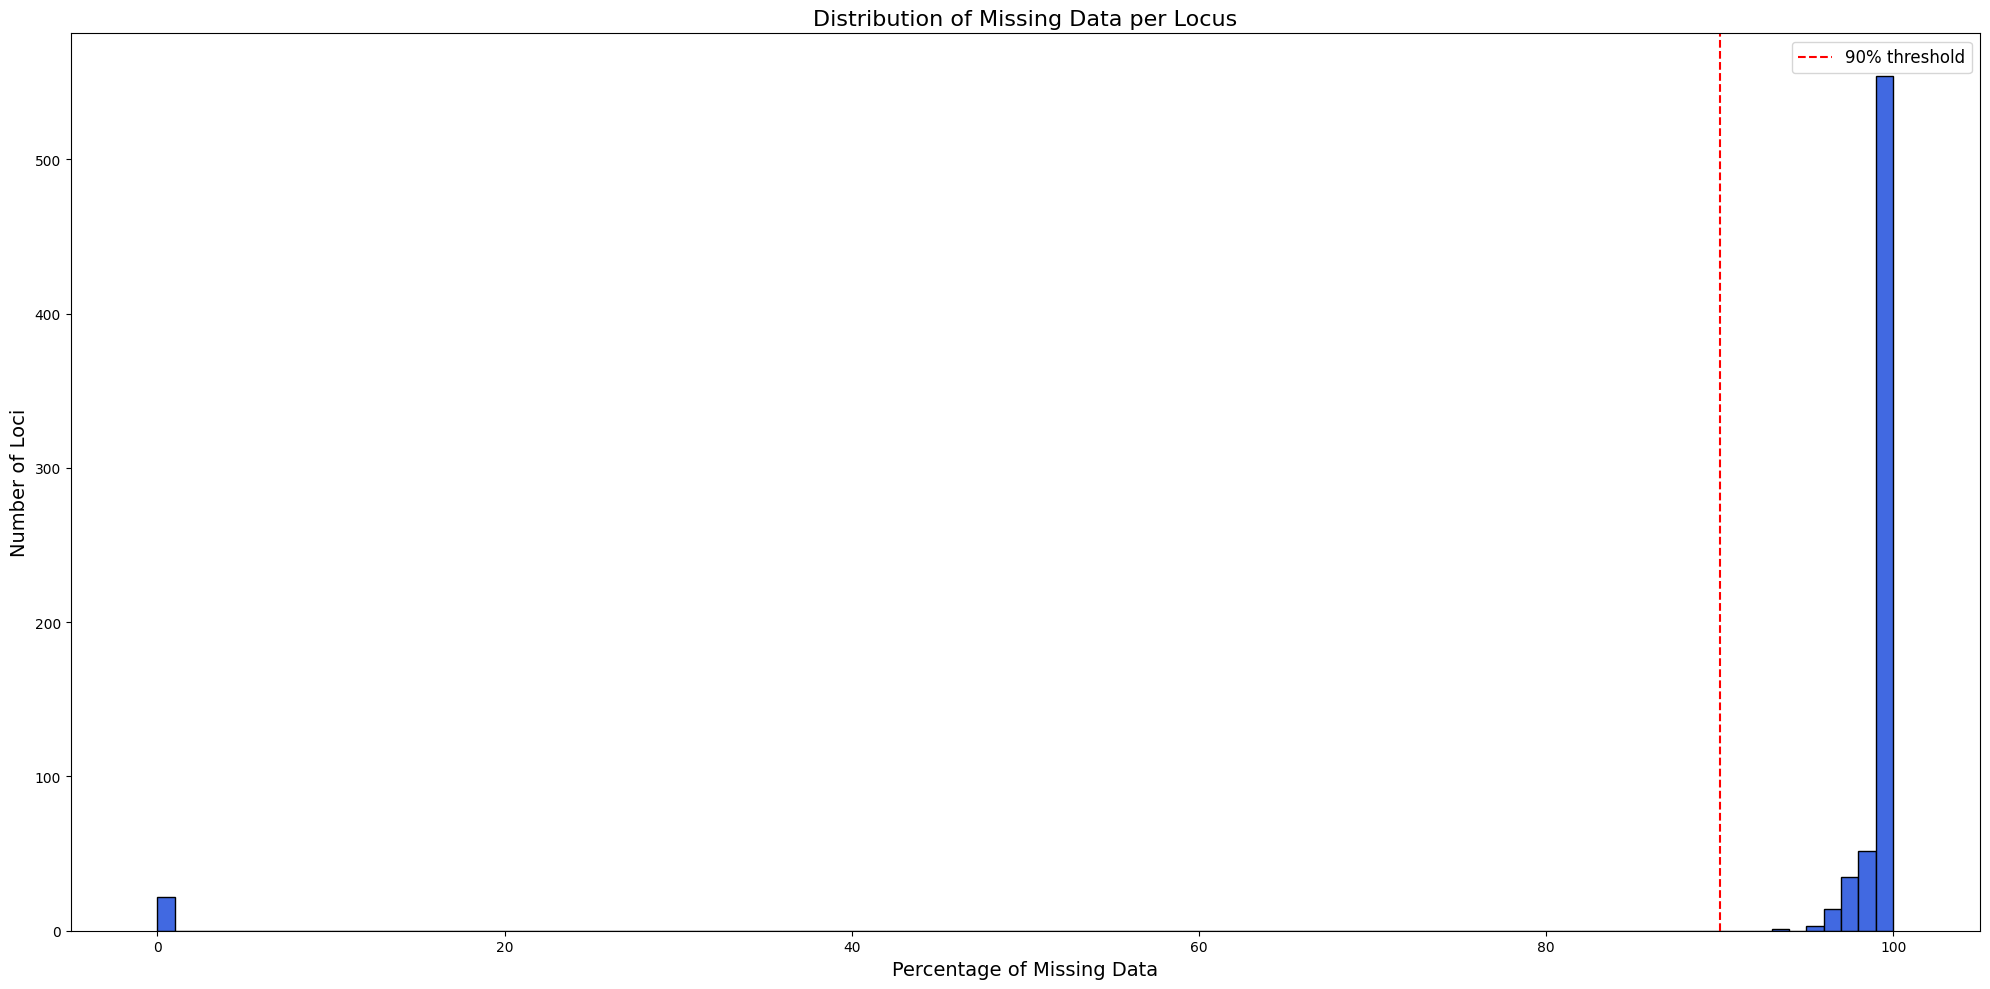

Loci with more than 10% missing in the isolates: 22
Average percentage of allele calls per locus: 96.24%
Loci with more than 10% missing data: ['SL0273', 'SL0479', 'SL0728', 'SL0104', 'SL0497', 'SL0344', 'SL0143', 'SL0559', 'SL0397', 'SL0006', 'SL0604', 'SL0082', 'SL0684', 'SL0842', 'SL0525', 'SL0716', 'SL0203', 'SL0252', 'SL0676', 'SL0328', 'SL0643', 'SL0584']


In [379]:
# Calculate the percentage identification for each locus
total_isolates = SL147_loci_test.shape[0]
total_loci=SL147_loci_test.shape[1]
percent_present_per_locus = 100 - (SL147_loci_test.isna().sum() / total_isolates) * 100

# Identify loci with more than 10% missing data
SL147loci_above_10_percent_missing = percent_present_per_locus[percent_present_per_locus < 90].index.tolist()

# Save as a text file
with open("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/SL147_missing_loci_10%.txt", "w") as file:
    for item in loci_above_10_percent_missing:
        file.write(f"{item}\n")

# Sort the percentages in ascending order 
percent_present_sorted = percent_present_per_locus.sort_values(ascending=True)

# Create the histogram
plt.figure(figsize=(20, 10)) 
plt.hist(percent_present_sorted.values, bins=100, color='royalblue', edgecolor='black')

# Enhance the plot
plt.title('Distribution of Missing Data per Locus', fontsize=16)
plt.xlabel('Percentage of Missing Data', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)

# Add a vertical line at 10% for reference
plt.axvline(x=90, color='red', linestyle='--', label='90% threshold')

# Add a legend
plt.legend(fontsize=12)

# Adjust layout
plt.tight_layout()

plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/Percentage_of_missing_loci_SL147_with_10%missing.png")

# Show the plot
plt.show()

# Print some statistics
print("Loci with more than 10% missing in the isolates: " + str(len(SL147loci_above_10_percent_missing)))
print(f"Average percentage of allele calls per locus: {percent_present_sorted.mean():.2f}%")

# Print the loci with more than 10% missing data
print("Loci with more than 10% missing data:", SL147loci_above_10_percent_missing)


In [380]:
# save as SL147 tag names eg SL0001 etc of 22 the loci with low allele call rate
with open('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/SL147loci_above_10_percent_missing_SL147tags.txt', 'w') as f:
    for item in SL147loci_above_10_percent_missing:
        f.write(f"{item}\n")

In [331]:
# save as loci names e.g. 10523-1014809-protein1202 etc of 22 the loci with low allele call rate
with open('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/SL147loci_above_10_percent_missing.txt', 'w') as f:
    for item in list(SL147_loci[SL147_loci['tag'].isin(SL147loci_above_10_percent_missing)]['locus']):
        f.write(f"{item}\n")

In [385]:
# the 659 loci tags (SL...) from the SL147 scheme to be used in the SL307 schemes
MatchingSL147_loci_to_keep = matchingSL147_tags.loc[
    ~matchingSL147_tags['tag'].isin(SL147loci_above_10_percent_missing), 'tag'
]
# save
with open('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/MatchingSL147_loci_to_use_in_SL307.txt', 'w') as f:
    for item in MatchingSL307_loci_to_keep:
        f.write(f"{item}\n")

In [387]:
# save the 659 SL307 loci that match the SL147 loci
matchingSL147_tags_filtered=matchingSL147_tags[~matchingSL147_tags['tag'].isin(SL147loci_above_10_percent_missing)]
matchingSL147_tags_filtered_loci=list(matchingSL147_tags_filtered['locus'])
len(matchingSL147_tags_filtered_loci)
matchingSL147_loci_filtered=blast_results_check_passed_VSSL147[blast_results_check_passed_VSSL147['old_locus'].isin(matchingSL147_tags_filtered_loci)]['new_locus']
with open('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/matchingSL147_loci_filtered.txt', 'w') as f:
    for item in list(matchingSL147_loci_filtered):
        f.write(f"{item}\n")

In [390]:
#save the names of the 947 SL147 loci (288+659)
SL147_loci_filtered_947=list(SL307_type_alleles_without_matching['locus']) + list(matchingSL147_loci_filtered)
with open('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/SL147_loci_filtered_947.txt', 'w') as f:
    for item in SL147_loci_filtered_947:
        f.write(f"{item}\n")

## So the new SL307 scheme will have 288 new loci and 659 loci from the scheme SL147
## in total 947 loci

# Statistics for the filtered ST307 loci


In [392]:
# open setup isolates data
set_up=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_setup_isolates.xlsx")
set_up=set_up.iloc[:, 2:]
set_up_filtered=set_up[SL147_loci_filtered_947]
allele_analysis_filtered = allele_analysis[allele_analysis['Locus'].isin(SL147_loci_filtered_947)]
longest_alleles_filtered = longest_alleles[longest_alleles['locus'].isin(SL147_loci_filtered_947)]

print(set_up_filtered.shape)
print(allele_analysis_filtered.shape)
print(longest_alleles_filtered.shape)

(1080, 947)
(947, 14)
(947, 3)


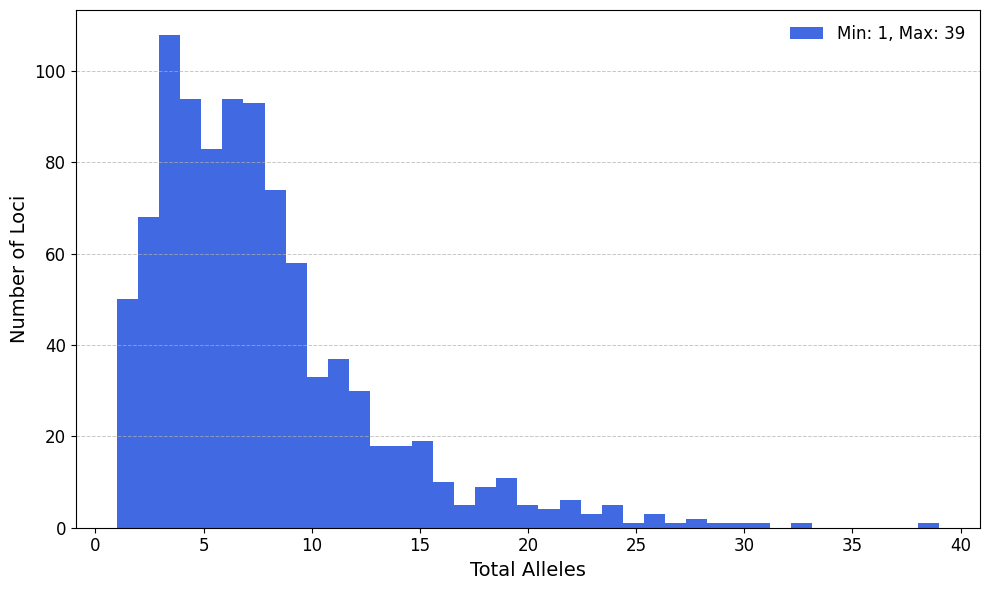

In [393]:
import matplotlib.pyplot as plt

# Calculate the range and bins
min_value = allele_analysis_filtered['Total Alleles'].min()
max_value = allele_analysis_filtered['Total Alleles'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    allele_analysis_filtered['Total Alleles'], 
    bins=bins, 
    range=(min_value, max_value), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('Total Alleles', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/total_alleles_filtered_947.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

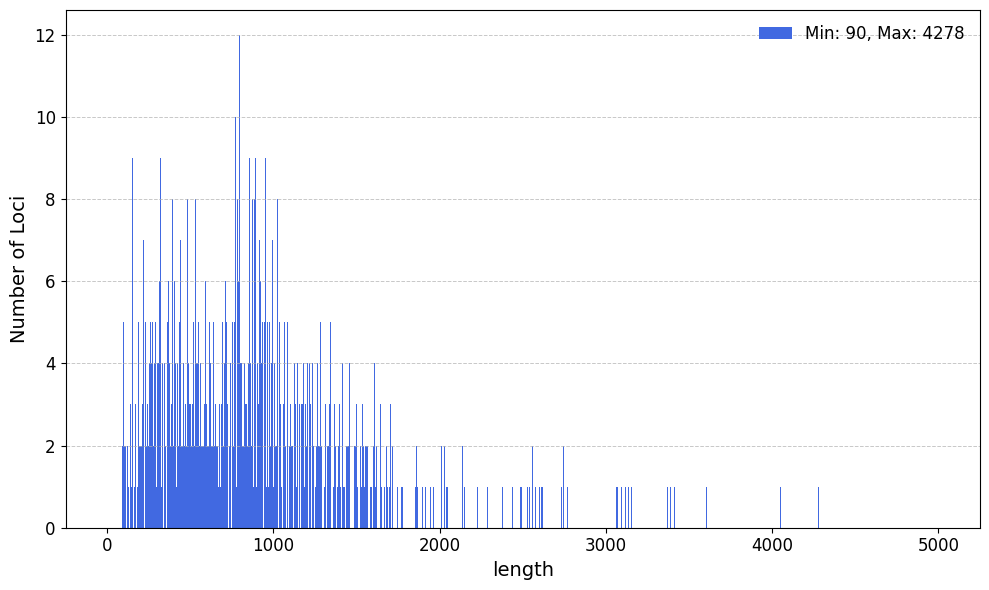

In [394]:
# Calculate the range and bins
min_value = longest_alleles_filtered['length'].min()
max_value = longest_alleles_filtered['length'].max()
bins = max_value - min_value +1 # Number of bins equals the range (inclusive)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(
    longest_alleles_filtered['length'], 
    bins=1000, 
    range=(0, 5000), 
    color='royalblue', 
    alpha=1, 
    edgecolor='black', 
    linewidth=0
)

# Add custom legend for min/max values
legend_text = f"Min: {min_value}, Max: {max_value}"
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=False)

# Customizing the plot
plt.xlabel('length', fontsize=14)
plt.ylabel('Number of Loci', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/longest_allele_lengths_filtered_947.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

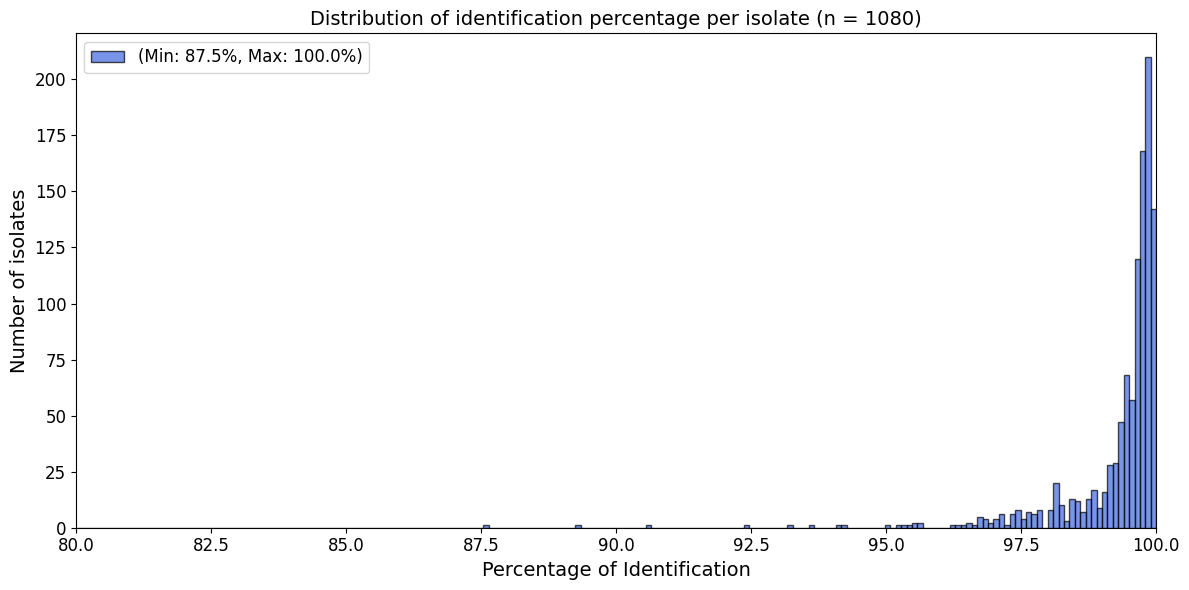

In [395]:
# identification percentage per locus import matplotlib.pyplot as plt
total_isolates=set_up_filtered.shape[0]
total_loci=set_up_filtered.shape[1]

# Calculate the percentage of missing/identified data for each isolate
percent_present_per_isolate = 100 - (set_up_filtered.isna().sum(axis=1) / total_loci) * 100

# Get min and max values
min_kpn = percent_present_per_isolate.min()
max_kpn = percent_present_per_isolate.max()

# Define bins
bins = np.linspace(80, 100, 200)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(percent_present_per_isolate, bins=bins, alpha=0.7, color='royalblue', edgecolor='black', label=f'(Min: {min_kpn:.1f}%, Max: {max_kpn:.1f}%)')

# Enhance the plot
plt.title(f'Distribution of identification percentage per isolate (n = {total_isolates})', fontsize=14)
plt.xlabel('Percentage of Identification', fontsize=14)
plt.ylabel('Number of isolates', fontsize=14)
plt.legend(fontsize=12)

# Limit x-axis from 80% to 100%
plt.xlim(80, 100)

# Remove bar labels (if previously set)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the plot
!mkdir -p plots
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/setup_per_isolate_filtered_947.png")

# Show the plot
plt.show()

In [364]:
#count the number of unique alleles per locus
unique_alleles_per_locus = set_up_filtered.nunique(dropna=True).reset_index()
unique_alleles_per_locus.columns = ["Locus", "allele_numbers"]
print(unique_alleles_per_locus.head(1))
# Merge with the frequent_alleles df which has the length data based on the "Locus" column
#allele_info_merged = pd.merge(frequent_alleles, unique_alleles_per_locus, on="Locus", how="inner") 
allele_info_merged = pd.merge(
    frequent_alleles, 
    unique_alleles_per_locus, 
    left_on="locus", 
    right_on="Locus", 
    how="inner"
)
print(allele_info_merged.head(1))

                     Locus  allele_numbers
0  11827-35816-protein3650               6
   allele  frequency                  locus  length  min_length  max_length  \
0     1.0   0.997222  11827-35816-protein10   390.0         372         408   

                   Locus  allele_numbers  
0  11827-35816-protein10               3  


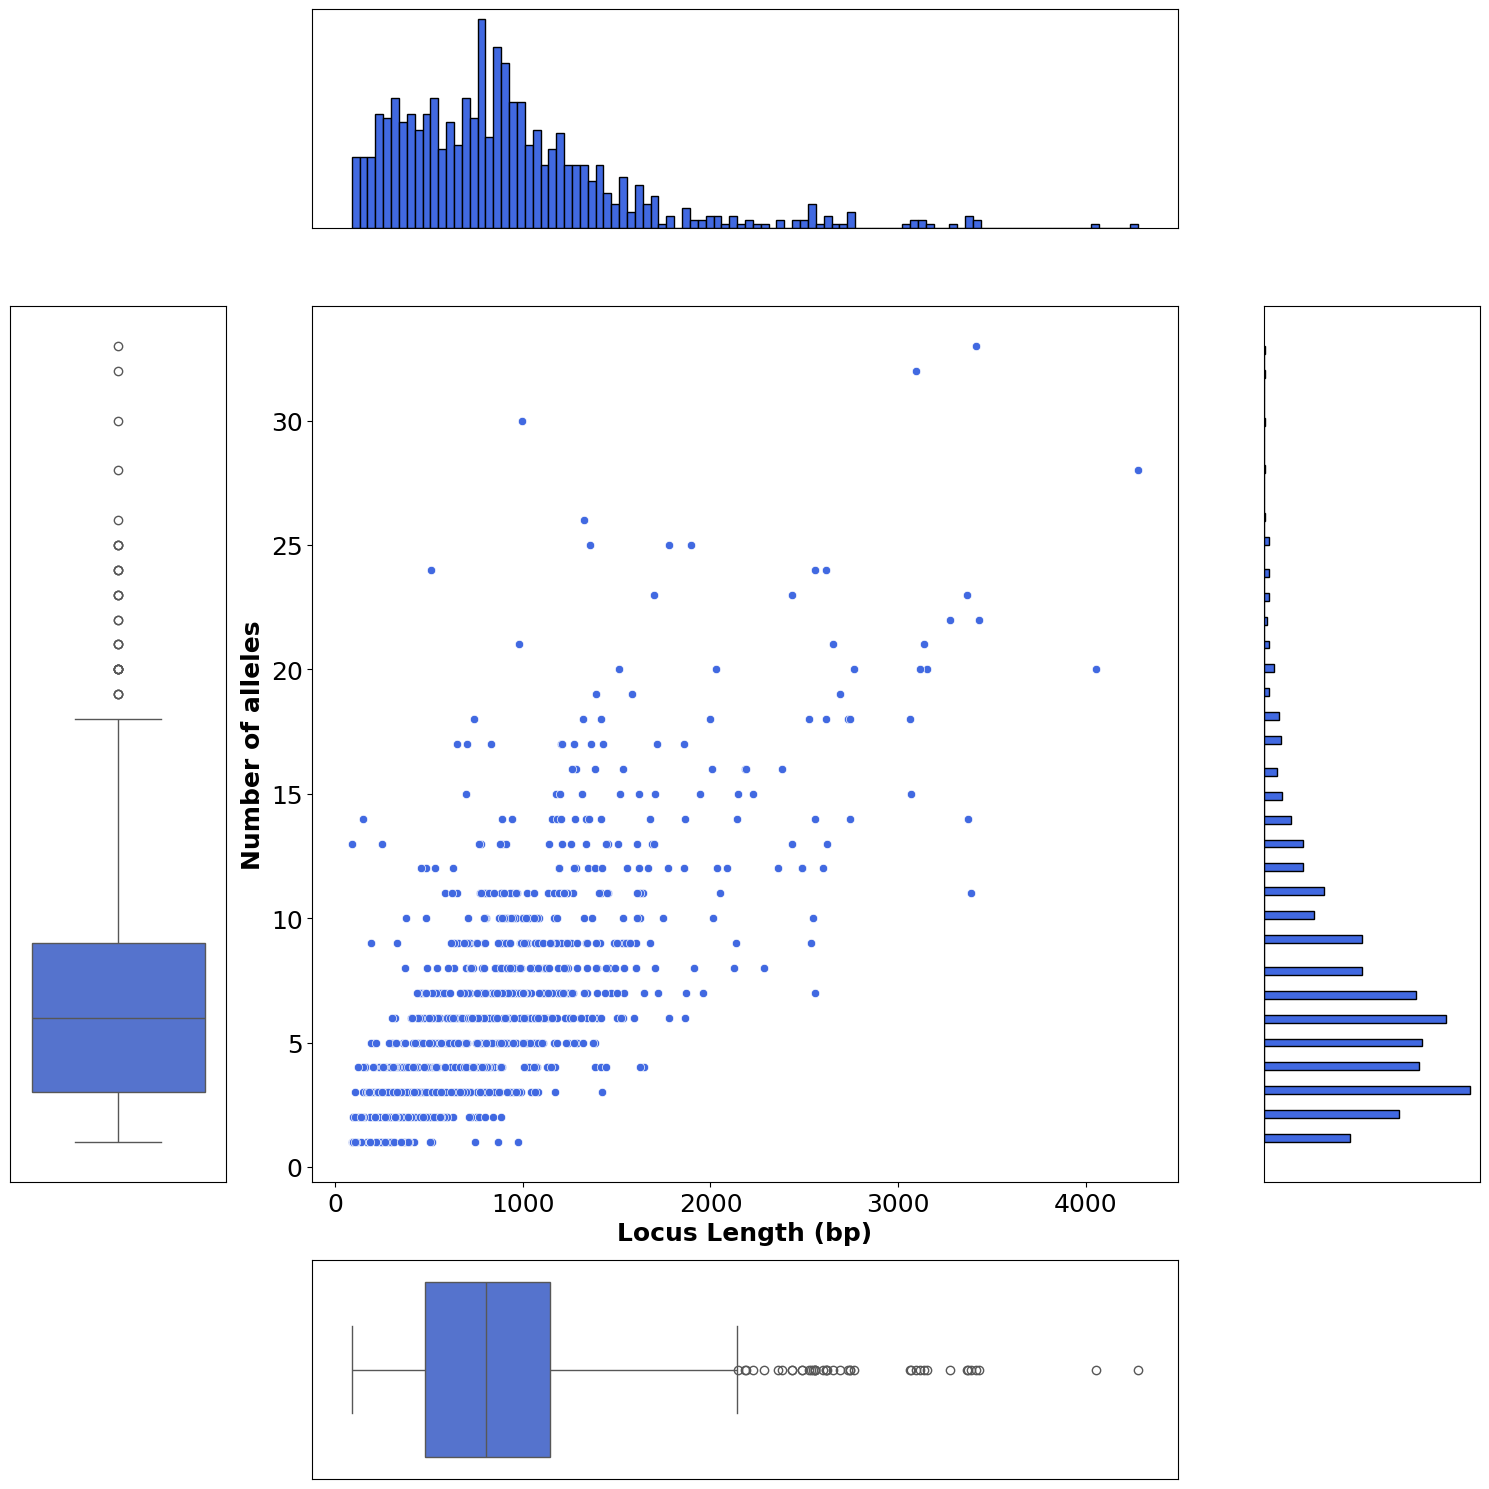

In [396]:
# Set up the figure with a 3x3 grid of subplots, making the center plot larger
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 3, width_ratios=[1, 4, 1], height_ratios=[1, 4, 1])

# Upper part: distribution of locus lengths (x-axis)
ax1 = fig.add_subplot(gs[0, 1])  # Top-center part
ax1.hist(allele_info_merged['length'], bins=100, edgecolor='black', color='royalblue')
# Remove labels and grid
ax1.set_title('')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(False)

# Bottom part: boxplot of locus lengths
ax2 = fig.add_subplot(gs[2, 1])  # Bottom-center part
sns.boxplot(x=allele_info_merged['length'], ax=ax2, color='royalblue')
ax2.set_title('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(False)

# Left part: boxplot of allele numbers (vertical)
ax4 = fig.add_subplot(gs[1, 0])  # Middle-left part
sns.boxplot(y=allele_info_merged['allele_numbers'], ax=ax4, color='royalblue')
ax4.set_title('')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.grid(False)

# Right part: distribution of allele numbers (horizontal)
ax3 = fig.add_subplot(gs[1, 2])  # Middle-right part
ax3.hist(allele_info_merged['allele_numbers'], bins=100, orientation='horizontal', edgecolor='black', color='royalblue')
ax3.set_title('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(False)

# Scatter plot in the center for locus length vs allele numbers
ax5 = fig.add_subplot(gs[1, 1])  # Center part
sns.scatterplot(x='length', y='allele_numbers', data=allele_info_merged, ax=ax5, color='royalblue')
ax5.set_xlabel('Locus Length (bp)', fontsize=18, fontweight='bold')  # Bold axis label
ax5.set_ylabel('Number of alleles', fontsize=18, fontweight='bold')  # Bold axis label

# Remove grid and ticks from the side plots
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticks([])
    ax.set_yticks([])

# Increase font size for axis tick labels only in the center plot
ax5.tick_params(axis='both', which='major', labelsize=18)

# Adjust the layout to avoid overlap
plt.tight_layout()
#save
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/plots/Nubmber_of_alleles_vs_Locus_length_947loci.png")

#display
plt.show()

# Check allele call rate in the setup and validation datasets

In [426]:
######################## open data for all isolates and all schemes
all_isolates=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/all_isolates_all_schemes_947.xlsx")
ST307_setup_isolates=pd.read_excel('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_setup_isolates.xlsx')

#separate setup from validation isolates
validation = all_isolates[~all_isolates["id"].isin(ST307_setup_isolates["id"])]
setup_isolates = all_isolates[all_isolates["id"].isin(ST307_setup_isolates["id"])]

#set ids as index
validation = validation.set_index(validation.columns[0])
setup_isolates = setup_isolates.set_index(setup_isolates.columns[0])

# remove isolates column
validation = validation.iloc[:, 1:]
setup_isolates = setup_isolates.iloc[:, 1:]

##### setup isolates
# Remove MLST loci columns
setup_all = setup_isolates.drop(setup_isolates.columns[2752+947+629:2752+947+629+7], axis=1)
dropped_columns_setup_all = setup_isolates.columns[2752+947+629:2752+947+629+7].tolist()

# Remove Kpn and SL307 loci 
setup_only_kpsc = setup_isolates.drop(setup_isolates.columns[:2752+947], axis=1)
dropped_columns_setup_only_kpsc = setup_isolates.columns[:2752+947].tolist()

# Remove ST147 loci 
setup_with_kpn = setup_all.drop(setup_all.columns[2752:2752+947], axis=1)
dropped_columns_setup_with_kpn =setup_all.columns[2752:2752+947].tolist()

# remove all loci besides SL147
setup_SL147=setup_isolates.iloc[:, 2752:2752+947]
dropped_columns_setup_SL147 = setup_isolates.columns[2752:2752+947].tolist()


##### Remove MLST loci columns
validation_all = validation.drop(validation.columns[2752+947+629:2752+947+629+7], axis=1)
dropped_columns_validation_all = validation.columns[2752+947+629:2752+947+629+7].tolist()

# Remove Kpn and SL307 loci 
validation_only_kpsc = validation.drop(validation.columns[:2752+947], axis=1)
dropped_columns_validation_only_kpsc = validation.columns[:2752+947].tolist()

# Remove ST147 loci 
validation_with_kpn = validation_all.drop(validation_all.columns[2752:2752+947], axis=1)
dropped_columns_validation_with_kpn =validation_all.columns[2752:2752+947].tolist()

# remove all loci besides SL147
validation_SL147=validation.iloc[:, 2752:2752+947]
dropped_columns_validation_SL147 = validation.columns[2752:2752+947].tolist()

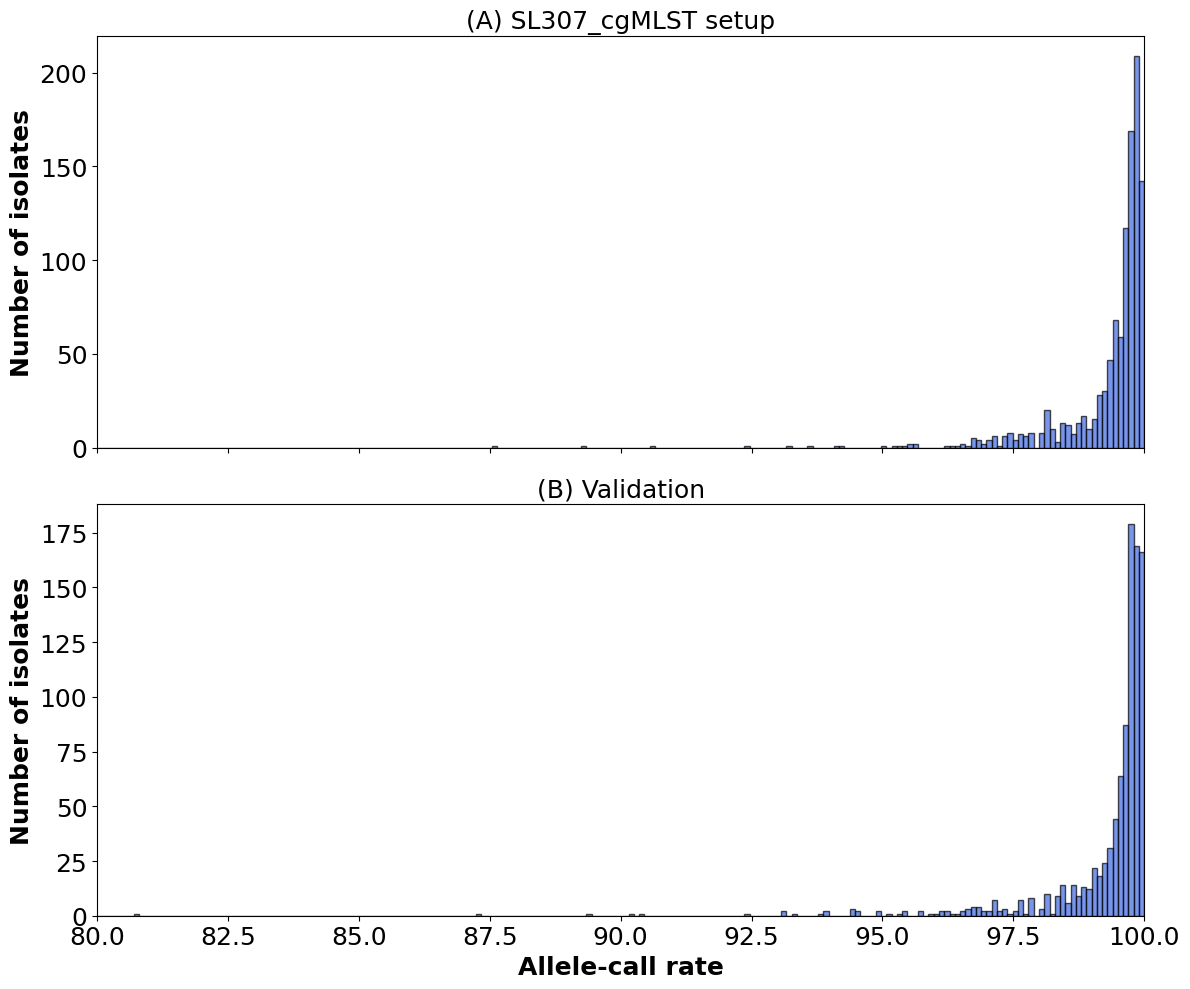

In [470]:
# First histogram data
total_loci_val = validation_SL147.shape[1]
percent_present_per_isolate_val = 100 - (validation_SL147.isna().sum(axis=1) / total_loci_val) * 100

min_val = percent_present_per_isolate_val.min()
max_val = percent_present_per_isolate_val.max()
mean_val = percent_present_per_isolate_val.mean()
std_val = percent_present_per_isolate_val.std()

# Second histogram data
total_loci_setup = setup_SL147.shape[1]
percent_present_per_isolate_setup = 100 - (setup_SL147.isna().sum(axis=1) / total_loci_setup) * 100

min_setup = percent_present_per_isolate_setup.min()
max_setup = percent_present_per_isolate_setup.max()
mean_setup = percent_present_per_isolate_setup.mean()
std_setup = percent_present_per_isolate_setup.std()

# Plotting
bins = np.linspace(80, 100, 200)
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top subplot: Setup isolates
axs[0].hist(percent_present_per_isolate_setup, bins=bins, alpha=0.7, color='royalblue', edgecolor='black')
axs[0].set_title('(A) SL307_cgMLST setup', fontsize=18)
axs[0].set_ylabel('Number of isolates', fontsize=18, fontweight='bold')
axs[0].set_xlim(80, 100)
axs[0].tick_params(axis='both', labelsize=18)
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)

# Bottom subplot: Validation isolates
axs[1].hist(percent_present_per_isolate_val, bins=bins, alpha=0.7, color='royalblue', edgecolor='black')
axs[1].set_title('(B) Validation', fontsize=18)
axs[1].set_xlabel('Allele-call rate', fontsize=18, fontweight='bold')
axs[1].set_ylabel('Number of isolates', fontsize=18, fontweight='bold')
axs[1].set_xlim(80, 100)
axs[1].tick_params(axis='both', labelsize=18)
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

plt.tight_layout()

# Save the figure
os.makedirs('plots', exist_ok=True)
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/setup_+_validation_allele_call_rate_histograms.png")
plt.show()

In [460]:
print(mean_setup)
print(std_setup)

99.35253627439475
1.0437570543780694


In [461]:
len(percent_present_per_isolate_setup[percent_present_per_isolate_setup<=95])

8

In [18]:
8/1080

0.007407407407407408

In [463]:
print(mean_val)
print(std_val)

99.30983520002769
1.3538802729000319


In [462]:
len(percent_present_per_isolate_val[percent_present_per_isolate_val<=95])

19

In [471]:
19/976

0.0194672131147541

# Checking the distances with or without the new schemes 

In [465]:
def pairwise_allelic_distance_matrix(df):

    # Ensure all data is numeric and treat 0 as missing
    numeric_data = df.apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(int)
    num_isolates = numeric_data.shape[0]
    distance_matrix = np.zeros((num_isolates, num_isolates), dtype=int)

    for i in range(num_isolates):
        for j in range(i + 1, num_isolates):
            # Positions where both are not missing (not zero)
            valid = (numeric_data[i] != 0) & (numeric_data[j] != 0)
            # Count of mismatches at valid (non-missing) positions
            mismatches = np.sum((numeric_data[i] != numeric_data[j]) & valid)
            distance_matrix[i, j] = mismatches
            distance_matrix[j, i] = mismatches  # symmetrical

    return pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

In [ ]:
########################################## make the pairwise allelic distance matrices
####################### setup
DM_setup_only_kpsc_df = pairwise_allelic_distance_matrix(setup_only_kpsc)

############## with kpn
DM_setup_with_kpn_df = pairwise_allelic_distance_matrix(setup_with_kpn)

############## all
DM_setup_all_df = pairwise_allelic_distance_matrix(setup_all)

In [466]:
########################################## make the pairwise allelic distance matrices
####################### setup
DM_setup_only_kpsc_df = pairwise_allelic_distance_matrix(setup_only_kpsc)

############## with kpn
DM_setup_with_kpn_df = pairwise_allelic_distance_matrix(setup_with_kpn)

############## all
DM_setup_all_df = pairwise_allelic_distance_matrix(setup_all)

In [467]:
print(DM_setup_all_df.shape)
DM_setup_all_df.head(1)

(1080, 1080)


id,3877,3901,3902,3906,3908,4014,4015,4379,4412,4416,...,59730,59749,59857,59926,73867,73872,73873,73897,73905,73935
id,,,,,,,,,,,,,,,,,,,,,
3877,0,51,47,51,64,21,73,21,31,24,...,65,60,58,69,108,67,45,86,69,59


In [468]:
print(DM_setup_with_kpn_df.shape)
DM_setup_with_kpn_df.head(1)

(1080, 1080)


id,3877,3901,3902,3906,3908,4014,4015,4379,4412,4416,...,59730,59749,59857,59926,73867,73872,73873,73897,73905,73935
id,,,,,,,,,,,,,,,,,,,,,
3877,0,41,35,40,52,16,61,17,22,17,...,53,46,45,60,89,55,33,68,51,44


In [469]:
print(DM_setup_only_kpsc_df.shape)
DM_setup_only_kpsc_df.head(1)

(1080, 1080)


id,3877,3901,3902,3906,3908,4014,4015,4379,4412,4416,...,59730,59749,59857,59926,73867,73872,73873,73897,73905,73935
id,,,,,,,,,,,,,,,,,,,,,
3877,0,3,4,9,7,3,5,2,1,4,...,7,3,8,5,9,7,5,4,4,2


/local/scratch/tmp/ipykernel_2706128/1897478320.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


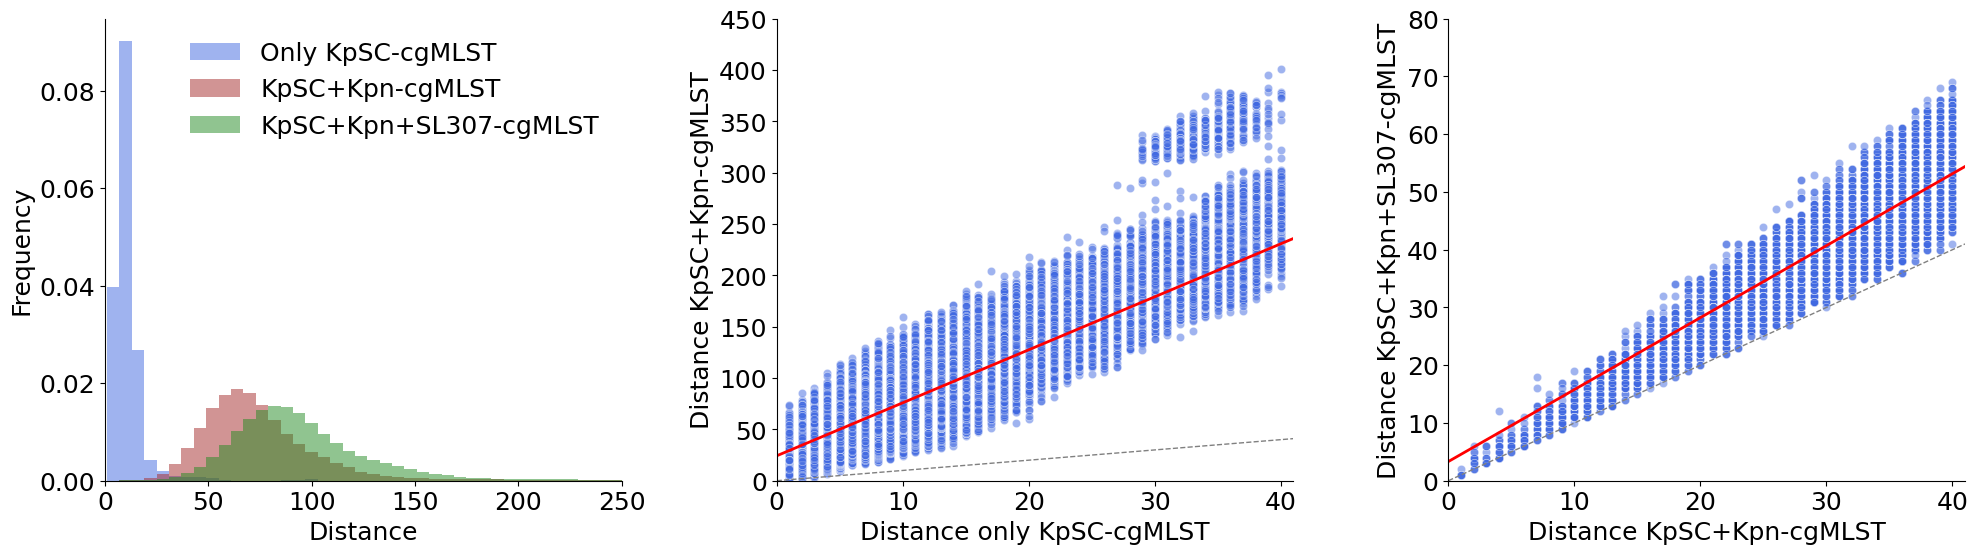

In [472]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

# Convert to NumPy arrays for first plot
distance_matrix_only_kpsc = DM_setup_only_kpsc_df.to_numpy()
distance_matrix_with_kpn = DM_setup_with_kpn_df.to_numpy()
distance_matrix_all = DM_setup_all_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_only_kpsc)
distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(24, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, 0])
common_range = (min(distances1.min(), distances2.min(), distances3.min()), 1500)
ax1.hist(distances1, bins=250, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances2, bins=250, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)
ax1.hist(distances3, bins=250, alpha=0.5, label='KpSC+Kpn+SL307-cgMLST', color='forestgreen', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlim(0, 250)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=18)


# 2 row, full-width subplot: Scatter plot
ax2 = fig.add_subplot(gs[0, 1])
threshold = 40
mask = distances1 <= threshold
filtered_distances1 = distances1[mask]
filtered_distances2 = distances2[mask]
ax2.scatter(
    filtered_distances1, 
    filtered_distances2, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope1, intercept, _, _, _ = linregress(distances1,distances2)

# Plot the linear regression line
x_values = np.array([0, 41])
ax2.plot(
    x_values, 
    slope1 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax2.set_xlabel('Distance only KpSC-cgMLST', fontsize=18)
ax2.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax2.set_ylim(0, 450)
ax2.set_xlim(0, 41)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Set the limits for the line
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax2.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

# 3rd row, full-width subplot: Scatter plot
ax3 = fig.add_subplot(gs[0, 2])
threshold = 40
mask = distances2 <= threshold
filtered_distances2 = distances2[mask]
filtered_distances3 = distances3[mask]
ax3.scatter(
    filtered_distances2, 
    filtered_distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope2, intercept, _, _, _ = linregress(distances2,distances3)

# Plot the linear regression line
x_values = np.array([0, 41])
ax3.plot(
    x_values, 
    slope2 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax3.set_xlabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax3.set_ylabel('Distance KpSC+Kpn+SL307-cgMLST', fontsize=18)
ax3.set_ylim(0, 80)
ax3.set_xlim(0, 41)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Set the limits for the line
x_min, x_max = ax3.get_xlim()
y_min, y_max = ax3.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax3.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_setup_long.png", dpi=600)
plt.show()

In [473]:
########################################## make the pairwise allelic distance matrices
####################### setup
DM_valid_only_kpsc_df = pairwise_allelic_distance_matrix(validation_only_kpsc)

############## with kpn
DM_valid_with_kpn_df = pairwise_allelic_distance_matrix(validation_with_kpn)

############## all
DM_valid_all_df = pairwise_allelic_distance_matrix(validation_all)

In [474]:
print(DM_valid_all_df.shape)
DM_valid_all_df.head(1)

(976, 976)


id,3903,3905,3907,4013,4016,4371,4386,4948,5212,5602,...,75597,75598,75599,75600,75603,75712,75731,75890,76245,76537
id,,,,,,,,,,,,,,,,,,,,,
3903,0,9,7,51,78,84,95,410,137,106,...,73,76,76,76,81,368,66,73,76,110


In [475]:
print(DM_valid_with_kpn_df.shape)
DM_valid_with_kpn_df.head(1)

(976, 976)


id,3903,3905,3907,4013,4016,4371,4386,4948,5212,5602,...,75597,75598,75599,75600,75603,75712,75731,75890,76245,76537
id,,,,,,,,,,,,,,,,,,,,,
3903,0,9,7,41,63,71,69,352,114,89,...,55,57,57,57,60,284,50,48,59,91


In [476]:
print(DM_valid_only_kpsc_df.shape)
DM_valid_only_kpsc_df.head(1)

(976, 976)


id,3903,3905,3907,4013,4016,4371,4386,4948,5212,5602,...,75597,75598,75599,75600,75603,75712,75731,75890,76245,76537
id,,,,,,,,,,,,,,,,,,,,,
3903,0,4,4,8,11,12,12,94,16,15,...,10,10,11,12,11,55,12,11,14,22


/local/scratch/tmp/ipykernel_2706128/3472655701.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


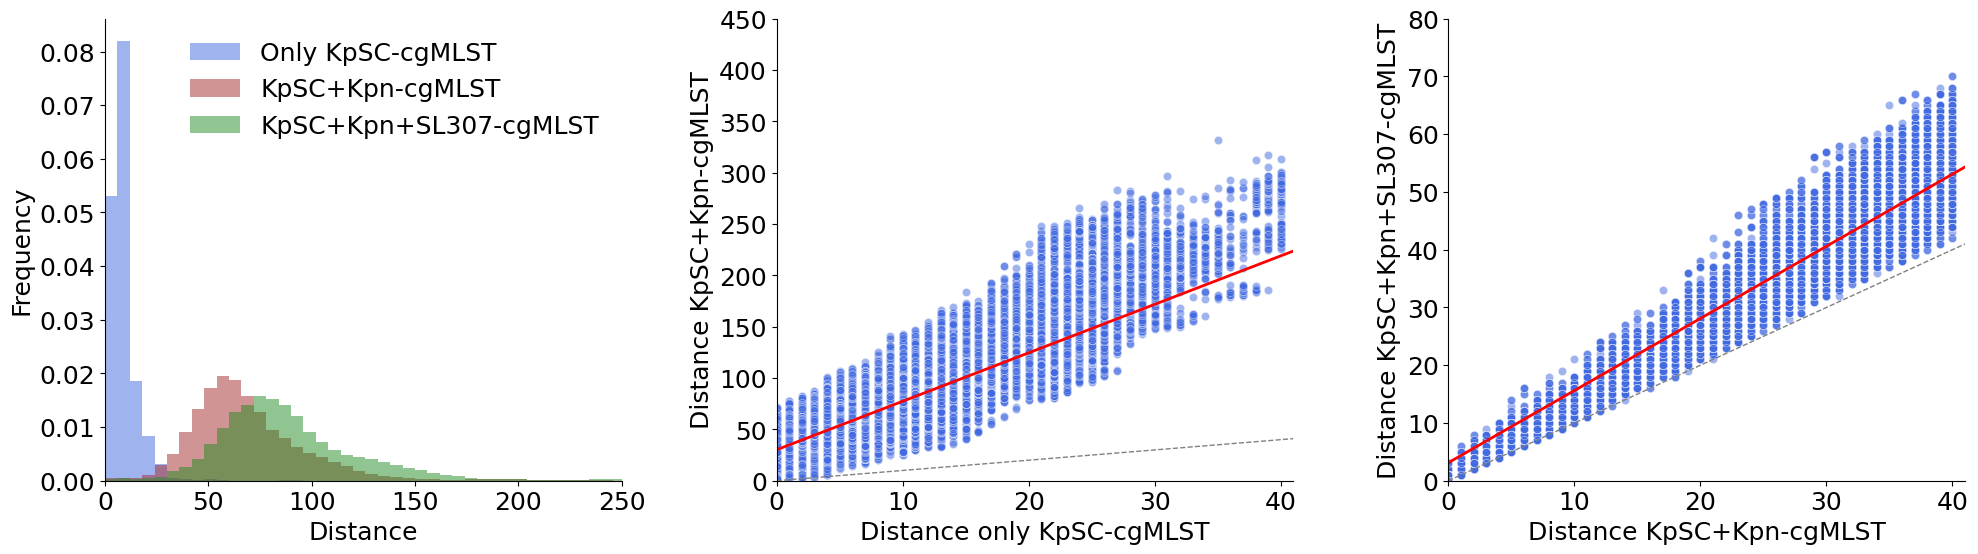

In [477]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import mannwhitneyu
from matplotlib.gridspec import GridSpec
from scipy.stats import linregress

# Convert to NumPy arrays for first plot
distance_matrix_only_kpsc = DM_valid_only_kpsc_df.to_numpy()
distance_matrix_with_kpn = DM_valid_with_kpn_df.to_numpy()
distance_matrix_all = DM_valid_all_df.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

distances1 = flatten_matrix(distance_matrix_only_kpsc)
distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(24, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.3)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, 0])
common_range = (min(distances1.min(), distances2.min(), distances3.min()), 1500)
ax1.hist(distances1, bins=250, alpha=0.5, label='Only KpSC-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances2, bins=250, alpha=0.5, label='KpSC+Kpn-cgMLST', color='brown', density=True, range=common_range)
ax1.hist(distances3, bins=250, alpha=0.5, label='KpSC+Kpn+SL307-cgMLST', color='forestgreen', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlim(0, 250)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=18)


# 2 row, full-width subplot: Scatter plot
ax2 = fig.add_subplot(gs[0, 1])
threshold = 40
mask = distances1 <= threshold
filtered_distances1 = distances1[mask]
filtered_distances2 = distances2[mask]
ax2.scatter(
    filtered_distances1, 
    filtered_distances2, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope1, intercept, _, _, _ = linregress(distances1,distances2)

# Plot the linear regression line
x_values = np.array([0, 41])
ax2.plot(
    x_values, 
    slope1 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax2.set_xlabel('Distance only KpSC-cgMLST', fontsize=18)
ax2.set_ylabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax2.set_ylim(0, 450)
ax2.set_xlim(0, 41)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Set the limits for the line
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax2.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

# 3rd row, full-width subplot: Scatter plot
ax3 = fig.add_subplot(gs[0, 2])
threshold = 40
mask = distances2 <= threshold
filtered_distances2 = distances2[mask]
filtered_distances3 = distances3[mask]
ax3.scatter(
    filtered_distances2, 
    filtered_distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Calculate linear regression
slope2, intercept, _, _, _ = linregress(distances2,distances3)

# Plot the linear regression line
x_values = np.array([0, 41])
ax3.plot(
    x_values, 
    slope2 * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

ax3.set_xlabel('Distance KpSC+Kpn-cgMLST', fontsize=18)
ax3.set_ylabel('Distance KpSC+Kpn+SL307-cgMLST', fontsize=18)
ax3.set_ylim(0, 80)
ax3.set_xlim(0, 41)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Set the limits for the line
x_min, x_max = ax3.get_xlim()
y_min, y_max = ax3.get_ylim()

# The line should pass through (0, 0) and have a slope of 1 (y = x)
# It needs to be extended, so let's make it cover from min to max limits
ax3.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_valid_long.png", dpi=600)
plt.show()

# Outbreak dataset

In [483]:
outbreak=pd.read_excel("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_outbreak/outbreak_all_schemes_957.xlsx")

# Set the first column as the index
outbreak_df = outbreak.set_index(outbreak.columns[1])

# Drop the next two columns (original column 1 and 2)
outbreak_all = outbreak_df.drop(outbreak_df.columns[:1], axis=1)
outbreak_all

,Kpn0001,Kpn0002,Kpn0003,Kpn0004,Kpn0005,Kpn0006,Kpn0007,Kpn0008,Kpn0009,Kpn0010,...,rpmA,rpmB,rpmC,rpmD,rpmE,rpmF,rpmG,rpmH,rpmI,rpmJ
isolate,,,,,,,,,,,,,,,,,,,,,
MRSN154289,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN1000007,1,9,1,35,NaN,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN101279,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN101296,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN147182,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRSN122972,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN128485,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343
MRSN128486,1,9,1,35,3.0,41,33,33,22,18,...,59,43,33,28,44;16454,41,1515,32,43,10;5343


In [486]:
DM_outbreak_all_df=pairwise_allelic_distance_matrix(outbreak_all)
DM_outbreak_all_df.head()

isolate,MRSN154289,MRSN1000007,MRSN101279,MRSN101296,MRSN147182,MRSN741505,MRSN741459,MRSN762893,MRSN123254,MRSN125022,...,MRSN118704,MRSN119408,MRSN119411,MRSN120444,MRSN121844,MRSN122972,MRSN128485,MRSN128486,MRSN144836,MRSN144864
isolate,,,,,,,,,,,,,,,,,,,,,
MRSN154289,0,83,82,82,81,89,89,92,25,28,...,22,28,22,27,28,23,24,12,22,23
MRSN1000007,83,0,1,1,1,80,80,83,83,85,...,81,88,81,86,87,82,83,87,81,82
MRSN101279,82,1,0,0,0,79,79,82,82,84,...,80,87,80,85,86,81,82,86,80,81
MRSN101296,82,1,0,0,0,79,79,82,82,84,...,80,87,80,85,86,81,82,86,80,81
MRSN147182,81,1,0,0,0,78,78,81,81,83,...,79,86,79,84,85,80,81,85,79,80


In [488]:
# SNP data
outbreak_SNVs_withGub = pd.read_csv("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_outbreak/ST307_SUBSET_filtered.snp-distances.csv", index_col=0)
outbreak_SNVs_withGub.head()

,MRSN103643,MRSN104416,MRSN109444,MRSN110385,MRSN111330,MRSN111357,MRSN116636,MRSN116640,MRSN116688,MRSN116691,...,MRSN128486,MRSN132238,MRSN134026,MRSN144836,MRSN144864,MRSN150461,MRSN154289,MRSN671528,MRSN920983,MRSN920991
MRSN103643,0,0,5,8,5,5,9,11,4,4,...,38,6,34,8,6,24,33,21,4,10
MRSN104416,0,0,5,8,5,5,9,11,4,4,...,38,6,34,8,6,24,33,21,4,10
MRSN109444,5,5,0,5,2,4,6,8,3,3,...,37,5,33,7,5,23,32,20,3,9
MRSN110385,8,8,5,0,5,7,1,3,6,6,...,40,8,36,10,8,26,35,23,6,12
MRSN111330,5,5,2,5,0,4,6,8,3,3,...,37,5,33,7,5,23,32,20,3,9


In [494]:
# keep only a subset of the isolates 
isolates = list(outbreak_SNVs_withGub.columns)
# Subset columns and rows, and make sure both have the same order
DM_outbreak_all_df_sub = DM_outbreak_all_df.loc[isolates, isolates]
DM_outbreak_all_df_sub.head()


isolate,MRSN103643,MRSN104416,MRSN109444,MRSN110385,MRSN111330,MRSN111357,MRSN116636,MRSN116640,MRSN116688,MRSN116691,...,MRSN128486,MRSN132238,MRSN134026,MRSN144836,MRSN144864,MRSN150461,MRSN154289,MRSN671528,MRSN920983,MRSN920991
isolate,,,,,,,,,,,,,,,,,,,,,
MRSN103643,0,0,3,5,3,1,6,8,7,7,...,25,2,22,3,2,16,23,14,3,7
MRSN104416,0,0,3,5,3,1,6,8,7,7,...,25,2,22,3,2,16,23,14,3,7
MRSN109444,3,3,0,4,2,2,5,7,8,8,...,26,3,23,4,3,17,24,15,4,8
MRSN110385,5,5,4,0,4,4,1,3,10,10,...,28,5,25,6,5,19,26,17,6,10
MRSN111330,3,3,2,4,0,2,5,7,8,8,...,26,3,23,4,3,17,24,15,4,8


In [493]:
outbreak_SNVs_withGub_reindexed = outbreak_SNVs_withGub.reindex(index=DM_outbreak_all_df_sub.index, columns=DM_outbreak_all_df_sub.columns)
outbreak_SNVs_withGub_reindexed.head()

isolate,MRSN103643,MRSN104416,MRSN109444,MRSN110385,MRSN111330,MRSN111357,MRSN116636,MRSN116640,MRSN116688,MRSN116691,...,MRSN128486,MRSN132238,MRSN134026,MRSN144836,MRSN144864,MRSN150461,MRSN154289,MRSN671528,MRSN920983,MRSN920991
isolate,,,,,,,,,,,,,,,,,,,,,
MRSN103643,0,0,5,8,5,5,9,11,4,4,...,38,6,34,8,6,24,33,21,4,10
MRSN104416,0,0,5,8,5,5,9,11,4,4,...,38,6,34,8,6,24,33,21,4,10
MRSN109444,5,5,0,5,2,4,6,8,3,3,...,37,5,33,7,5,23,32,20,3,9
MRSN110385,8,8,5,0,5,7,1,3,6,6,...,40,8,36,10,8,26,35,23,6,12
MRSN111330,5,5,2,5,0,4,6,8,3,3,...,37,5,33,7,5,23,32,20,3,9


# ARI 

In [501]:
# clustering SNP data
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# If your matrix is a pandas DataFrame, convert to numpy array first
snvs_withGub = outbreak_SNVs_withGub_reindexed.values

# 1. Convert matrix to condensed form (lower triangle, excluding diagonal)
condensed = squareform(snvs_withGub)

# 2. Perform hierarchical clustering (single-linkage)
Z = linkage(condensed, method='single')

# 3. Assign clusters using your SNP cut-off (t=4)
clusters = fcluster(Z, t=4, criterion='distance')

# 4. (Optional) Show cluster assignments
print(clusters)

# If you want to save cluster assignments with isolate names (if using pandas)
# import pandas as pd
cluster_SNV = pd.DataFrame({'Isolate': outbreak_SNVs_withGub_reindexed.index, 'Cluster': clusters})
cluster_SNV.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_outbreak/cluster_assignments_SNV_4_947.csv', index=False)

[ 4  4  4  3  4  4  3  3  4  4  4  4  4  3  3  4  4  3  4  4  4  4  4  3
  3  3  4  4  4  3  4  4  4  4  5  1  2  4  7  4  8  4  4  9 10  9  4  6]


In [505]:
#clusters cgMLST data

# If your matrix is a pandas DataFrame, convert to numpy array first
DM_outbreak_all_df_sub_np = DM_outbreak_all_df_sub.values

# 1. Convert matrix to condensed form (lower triangle, excluding diagonal)
condensed = squareform(DM_outbreak_all_df_sub_np)

# 2. Perform hierarchical clustering (single-linkage)
Z = linkage(condensed, method='single')

# 3. Assign clusters using your SNP cut-off (t=4)
clusters = fcluster(Z, t=2, criterion='distance')

# 4. (Optional) Show cluster assignments
print(clusters)

# If you want to save cluster assignments with isolate names (if using pandas)
# import pandas as pd
cluster_mlst = pd.DataFrame({'Isolate': DM_outbreak_all_df_sub.index, 'Cluster': clusters})
cluster_mlst['Isolate'] = 'MRSN' + cluster_mlst['Isolate'].astype(str)
cluster_mlst.to_csv('./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/datasets/ST307_outbreak/cluster_assignments_mlst_4_947.csv', index=False)

[ 5  5  5  4  5  5  4  4  3  3  5  3  3  4  4  3  3  4  3  5  5  5  5  4
  4  4  3  3  5  4  5  3  3  5  6  1  2  5  9  5 10  5  5  8 11  8  5  7]


In [506]:
from sklearn.metrics import adjusted_rand_score

labels_SNV = cluster_SNV['Cluster'].values  
labels_mlst = cluster_mlst['Cluster'].values 

ari = adjusted_rand_score(labels_mlst, labels_SNV)
print(f"Adjusted Rand Index: {ari:.4f}")

Adjusted Rand Index: 0.6059


Slope: 0.6600
Slope standard error: 0.0076
t-statistic (slope=1): -44.9626
p-value (slope=1): 1.328e-253


/local/scratch/tmp/ipykernel_2706128/3897794863.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


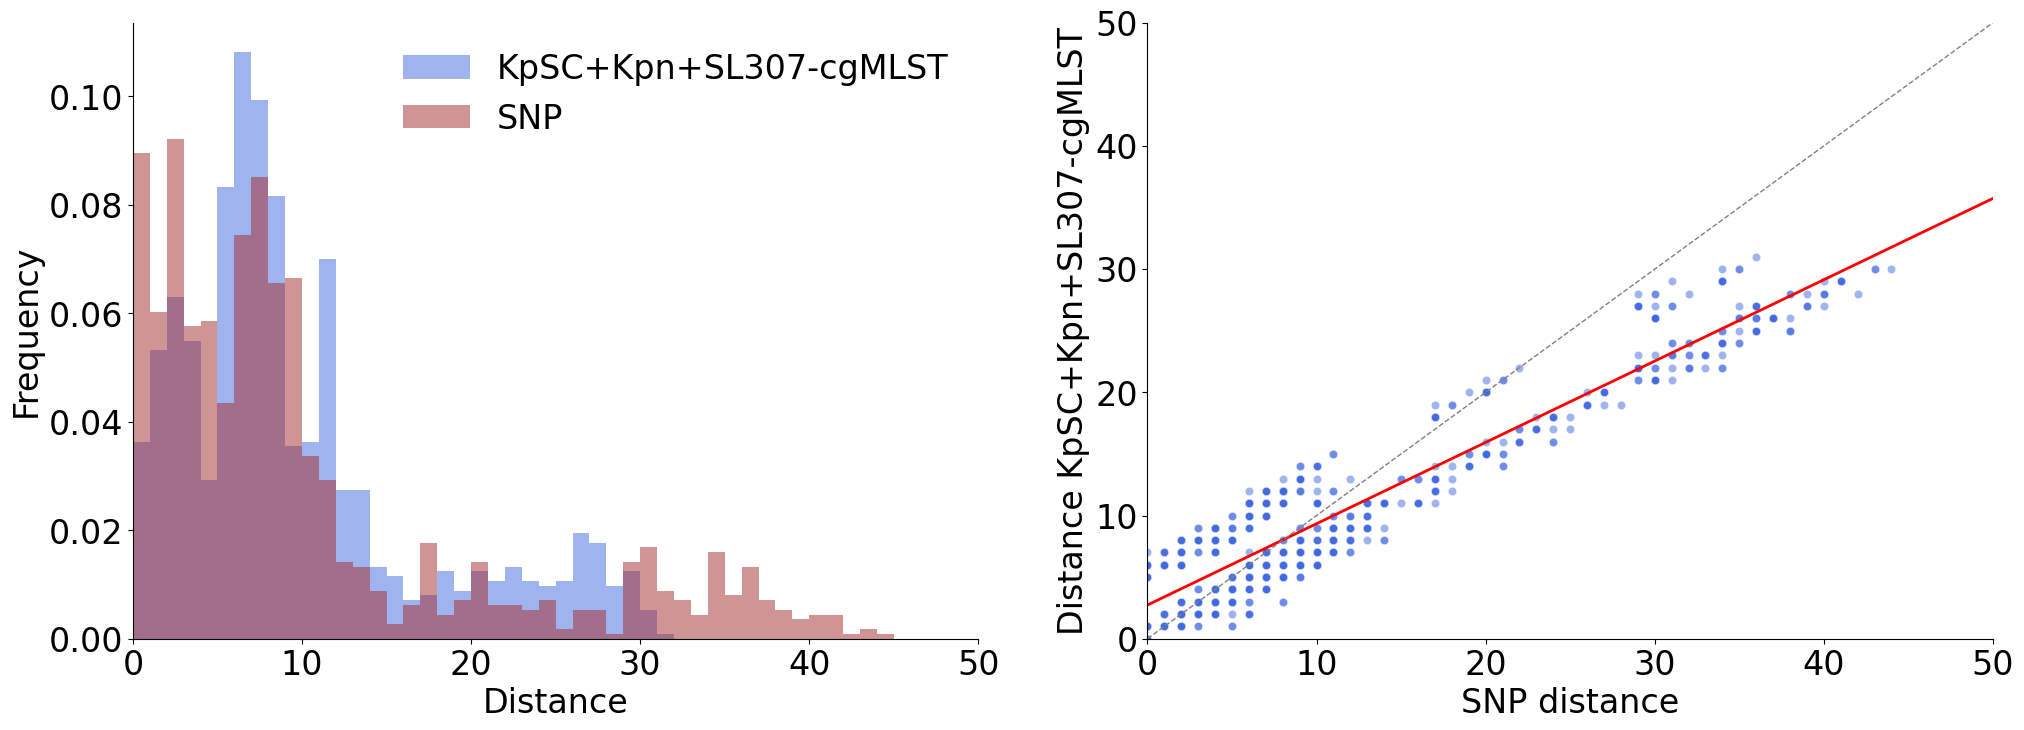

In [510]:
from scipy.stats import linregress, pearsonr

# Convert to NumPy arrays for first plot
#distance_matrix_only_kpsc = DM_outbreak_only_kpsc_df.to_numpy()
#distance_matrix_with_kpn = DM_outbreak_with_kpn_df.to_numpy()
distance_matrix_all = DM_outbreak_all_df_sub.to_numpy()
#snvs_noGub=outbreak_SNVs_noGub_reindexed.to_numpy()
snvs_withGub=outbreak_SNVs_withGub_reindexed.to_numpy()

# Flatten the matrices, excluding the diagonal
def flatten_matrix(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]

# distances1 = flatten_matrix(distance_matrix_only_kpsc)
# distances2 = flatten_matrix(distance_matrix_with_kpn)
distances3 = flatten_matrix(distance_matrix_all)
#distances4 = flatten_matrix(snvs_noGub)
distances5 = flatten_matrix(snvs_withGub)

# Prepare combined figure with specified layout
fig = plt.figure(figsize=(24, 8))
gs = GridSpec(1, 2, width_ratios=[1,1], wspace=0.2)

# First row, first subplot: Histograms
ax1 = fig.add_subplot(gs[0, 0])
common_range = (min(distances3.min(), distances5.min()), 50)
ax1.hist(distances3, bins=50, alpha=0.5, label='KpSC+Kpn+SL307-cgMLST', color='royalblue', density=True, range=common_range)
ax1.hist(distances5, bins=50, alpha=0.5, label='SNP', color='brown', density=True, range=common_range)
ax1.set_xlabel('Distance', fontsize=24)
ax1.set_ylabel('Frequency', fontsize=24)
ax1.set_xlim(0, 50)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# Create legend without borders
ax1.legend(loc='upper right', frameon=False, fontsize=24)


# fourth row, full-width subplot: Scatter plot
ax4 = fig.add_subplot(gs[0, 1])

# Calculate linear regression
slope, intercept, _, _, _ = linregress(distances5,distances3)



from scipy.stats import t

# Calculate linear regression (already done, but fetch slope_stderr too)
slope, intercept, r_value, p_value, slope_stderr = linregress(distances5, distances3)

# Degrees of freedom
n = len(distances5)
df = n - 2

# t-statistic for test that slope == 1
t_stat = (slope - 1) / slope_stderr

# Two-sided p-value for t-test
p_slope1 = 2 * t.sf(np.abs(t_stat), df)

print(f"Slope: {slope:.4f}")
print(f"Slope standard error: {slope_stderr:.4f}")
print(f"t-statistic (slope=1): {t_stat:.4f}")
print(f"p-value (slope=1): {p_slope1:.4g}")

# Calculate the Pearson correlation coefficient
pearson_r, _ = pearsonr(distances5, distances3)

# Scatter plot of the data
ax4.scatter(
    distances5, 
    distances3, 
    alpha=0.5, 
    color='royalblue', 
    edgecolors='w', 
    linewidth=0.5
)

# Plot the linear regression line
x_values = np.array([0, 50])
ax4.plot(
    x_values, 
    slope * x_values + intercept, 
    color='red', 
    linewidth=2, 
    label='_nolegend_'
)

# Set axes labels and limits
ax4.set_xlabel('SNP distance', fontsize=24)
ax4.set_ylabel('Distance KpSC+Kpn+SL307-cgMLST', fontsize=24)
ax4.set_ylim(0, 50)
ax4.set_xlim(0, 50)
ax4.tick_params(axis='both', which='major', labelsize=24)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Plot the y=x line (diagonal line for reference)
x_min, x_max = ax4.get_xlim()
ax4.plot(
    [x_min, x_max], 
    [x_min, x_max], 
    linestyle='--', 
    color='gray', 
    linewidth=1
)

plt.tight_layout()
plt.savefig("./Centaur_project/Klebsiella/KpI/ST307/chewBBACA_LIN10/Allele_sequences_95/BIGSdb_tests/plots/combined_subplots_histogram_outbreak_947.png", dpi=600)
plt.show()